## <b> Have you ever wondered which time is the best time to book a hotel room?

## <b> This hotel booking dataset can help you explore many questions </b>

## <b> Let's Explore and analyze the data to discover important factors that govern the bookings </b>
    



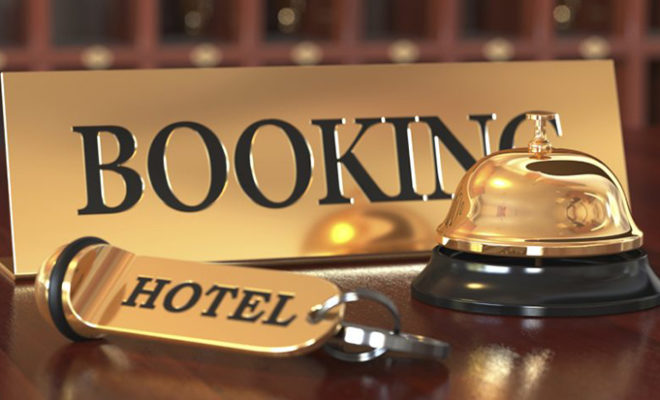

# Importing Essential Libraries

In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  ##to import %matplotlib inline to data visualization itself no need to call.
%matplotlib inline   
from datetime import datetime
import warnings

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

# Reading Data

In [31]:
df1= pd.read_csv("D:\Jupyter Notebook\Capstone Project\hotel Booking\Hotel Bookings.csv")

# Making a Copy of Original Dataset

In [32]:
df=df1.copy() #to make a copy of entire dataset

# Data Exploration

In [33]:
df.shape
print(f'We have total {df.shape[0]} rows and {df.shape[1]} columns')

We have total 119390 rows and 34 columns


In [34]:
df.head(5)

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  City Hotel         Yes        265               2015               July   
1  City Hotel         Yes        258               2015               July   
2  City Hotel         Yes        258               2015               July   
3  City Hotel         Yes        258               2015               July   
4  City Hotel         Yes        258               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        28                          9   
1                        27                          2   
2                        27                          2   
3                        27                          2   
4                        27                          2   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     2       2       0.0       0   
1                        0                     2       2       0.0       0   
2                        0                     2       2       0.0       0   
3                        0                     2       2       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel is_repeated_guest  \
0   BB     PRT         Groups                TA/TO               Yes   
1   BB     PRT         Groups                TA/TO               Yes   
2   BB     PRT         Groups                TA/TO               Yes   
3   BB     PRT         Groups                TA/TO               Yes   
4   BB     PRT         Groups                TA/TO               Yes   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                      21                               0                  A   
1                       1                               0                  A   
2                       1                               0                  A   
3                       1                               0                  A   
4                       1                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  A                0   No Deposit    1.0      NaN   
1                  A                0   No Deposit    1.0      NaN   
2                  A                0   No Deposit    1.0      NaN   
3                  A                0   No Deposit    1.0      NaN   
4                  A                0   No Deposit    1.0      NaN   

   days_in_waiting_list    customer_type   adr  required_car_parking_spaces  \
0                     0  Transient-Party  62.8                            0   
1                     0  Transient-Party  62.8                            0   
2                     0  Transient-Party  62.8                            0   
3                     0  Transient-Party  62.8                            0   
4                     0  Transient-Party  62.8                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0           Canceled                17-10-14   
1                          0           Canceled                17-10-14   
2                          0           Canceled                17-10-14   
3                          0           Canceled                17-10-14   
4                          0           Canceled                17-10-14   

   Service_rating Service_rating_text  
0               2                Poor  
1               2                Poor  
2               1                Poor  
3               1                Poor  
4               2                Poor

In [35]:
df.tail(5)

hotel is_canceled  lead_time  arrival_date_year  \
119385  Resort Hotel          No        212               2017   
119386  Resort Hotel          No        169               2017   
119387  Resort Hotel          No        204               2017   
119388  Resort Hotel          No        211               2017   
119389  Resort Hotel          No        161               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         31                        2   
119386                         30                        2   
119387                         29                        4   
119388                         31                        4   
119389                         31                        4   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     8       2       1.0       0   BB     GBR   
119386                     9       2       0.0       0   BB     IRL   
119387                    10       2       0.0       0   BB     IRL   
119388                    10       2       0.0       0   HB     GBR   
119389                    10       2       0.0       0   HB     DEU   

       market_segment distribution_channel is_repeated_guest  \
119385  Offline TA/TO                TA/TO                No   
119386         Direct               Direct                No   
119387         Direct               Direct                No   
119388  Offline TA/TO                TA/TO                No   
119389  Offline TA/TO                TA/TO                No   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                1   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  E                  E                0   No Deposit   
119388                  D                  D                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list    customer_type     adr  \
119385  143.0      NaN                     0        Transient   89.75   
119386  250.0      NaN                     0  Transient-Party  202.27   
119387  250.0      NaN                     0        Transient  153.57   
119388   40.0      NaN                     0         Contract  112.80   
119389   69.0      NaN                     0        Transient   99.06   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          1   
119387                            0                          3   
119388                            0                          1   
119389                            0                          0   

       reservation_status reservation_status_date  Service_rating  \
119385          Check-Out                10-09-17               0   
119386          Check-Out                10-09-17               2   
119387          Check-Out                12-09-17               1   
119388          Check-Out                14-09-17               1   
119389          Check-Out                14-09-17      

In [36]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include="all")

hotel is_canceled      lead_time  arrival_date_year  \
count       119390      119390  119390.000000      119390.000000   
unique           2           2            NaN                NaN   
top     City Hotel          No            NaN                NaN   
freq         79330       75166            NaN                NaN   
mean           NaN         NaN     104.011416        2016.156554   
std            NaN         NaN     106.863097           0.707476   
min            NaN         NaN       0.000000        2015.000000   
25%            NaN         NaN      18.000000        2016.000000   
50%            NaN         NaN      69.000000        2016.000000   
75%            NaN         NaN     160.000000        2017.000000   
max            NaN         NaN     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults       children         babies  \
count          119390.000000  119390.000000  119386.000000  119390.000000   
unique                   NaN            NaN            NaN            NaN   
top                      NaN            NaN            NaN            NaN   
freq                     NaN            NaN            NaN            NaN   
mean                2.500302       1.856403       0.103890       0.007949   
std                 1.908286       0.579261       0.398561       0.097436   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 1.000000       2.000000       0.000000       0.000000   
50%                 2.000000       2.000000       0.000000       0.000000   
75%                 3.000000       2.000000       0.000000       0.000000   
max                50.000000      55.000000      10.000000      10.000000   

          meal country market_segment distribution_channel is_repeated_guest  \
count   119390  118902         119390               119390            119390   
unique       5     177              8                    5                 2   
top         BB     PRT      Online TA                TA/TO                No   
freq     92310   48590          56477                97870            115580   
mean       NaN     NaN            NaN                  NaN               NaN   
std        NaN     NaN            NaN                  NaN               NaN   
min        NaN     NaN            NaN                  NaN               NaN   
25%        NaN     NaN            NaN                  NaN               NaN   
50%        NaN     NaN            NaN                  NaN               NaN   
75%        NaN     NaN            NaN                  NaN       

In [37]:
print(list(df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'Service_rating', 'Service_rating_text']


In [38]:
#looking for the data types non null entries  #string = object and int64 = number and float = decimal number 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

33. **Service_rating** : *Customer gives rating on hotel service which is out 5 *

33. **Service_rating_text** : *Rating category*
* 0 = No Rating
* 1 = Poor
* 2 = Poor
* 3 = Averge
* 4 = Averge
* 5 = Excellent


In [39]:
# converting object type to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], infer_datetime_format = True)

In [40]:
df['reservation_status_date'].dtype #checking the datatpe of "reservation_status_date"

dtype('<M8[ns]')

In [41]:
df["is_canceled"].replace(["Yes","No"],[1,0],inplace = True)
df["is_repeated_guest"].replace(["Yes","No"],[1,0],inplace = True)
df.head(2)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  City Hotel            1        265               2015               July   
1  City Hotel            1        258               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        28                          9   
1                        27                          2   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     2       2       0.0       0   
1                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Groups                TA/TO                  1   
1   BB     PRT         Groups                TA/TO                  1   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                      21                               0                  A   
1                       1                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  A                0   No Deposit    1.0      NaN   
1                  A                0   No Deposit    1.0      NaN   

   days_in_waiting_list    customer_type   adr  required_car_parking_spaces  \
0                     0  Transient-Party  62.8                            0   
1                     0  Transient-Party  62.8                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0           Canceled              2014-10-17   
1                          0           Canceled              2014-10-17   

   Service_rating Service_rating_text  
0               2                Poor  
1               2                Poor

In [42]:
df.assigned_room_type.unique()

array(['A', 'E', 'D', 'H', 'G', 'C', 'F', 'B', 'I', 'L', 'K', 'P'],
      dtype=object)

In [43]:
df.dtypes.sort_values(ascending = True) #checking datatype is coverted or Not

is_repeated_guest                          int64
booking_changes                            int64
days_in_waiting_list                       int64
previous_bookings_not_canceled             int64
previous_cancellations                     int64
Service_rating                             int64
required_car_parking_spaces                int64
total_of_special_requests                  int64
adults                                     int64
babies                                     int64
stays_in_weekend_nights                    int64
arrival_date_day_of_month                  int64
arrival_date_week_number                   int64
children                                 float64
company                                  float64
adr                                      float64
reservation_status_date           datetime64[ns]
arrival_date_year                          int64
lead_time                                  int64
is_canceled                                int64
stays_in_week_nights

<AxesSubplot:ylabel='count'>

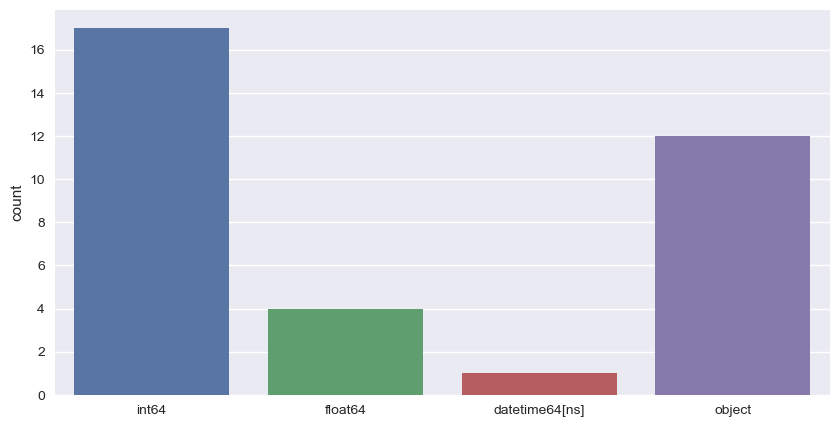

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.dtypes.sort_values(ascending = True))  # just for understanding in this dataset which datatye is most

# Data Cleaning

In [45]:
df.duplicated().value_counts() #true means duplicate rows

False    96265
True     23125
dtype: int64

<AxesSubplot:ylabel='count'>

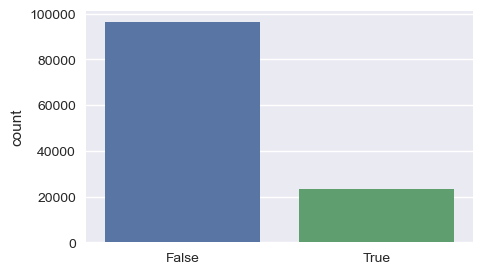

In [46]:
# Visulizing through Count pot
plt.figure(figsize=(5,3))
sns.countplot(x=df.duplicated())

So we have 18309 duplicate rows in our data. So we will drop the duplicate rows from our data

In [47]:
#df.drop_duplicates()
df.shape

(119390, 34)

In [48]:
df= df.drop_duplicates()

In [49]:
# data set reduced
df.shape

(96265, 34)

In [50]:
#checking the null value
df.isnull().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'column',0:'Null values'})

column  Null values
0   company        90396
1     agent        13422
2   country          460
3  children            4
4     hotel            0

Text(0.5, 1.0, 'Places of missing values in column')

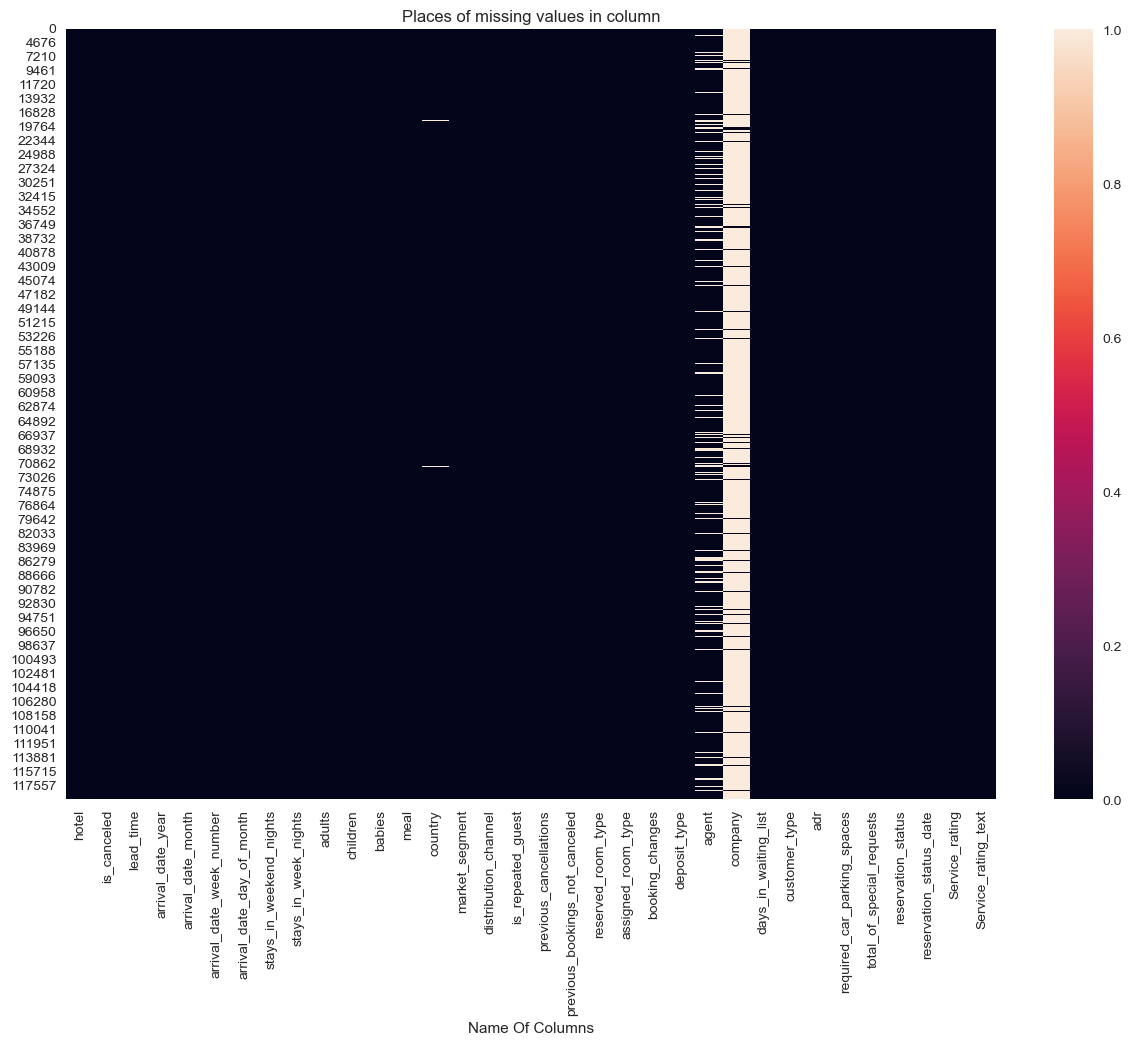

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

So we Have Null values in columns- Company, agent, Country,children.
1. for company and agent I will fill the Missing values with 0
2. for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
3. AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [52]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)

In [53]:
# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)
df.country.unique() #cross verification of country Column is updated with "others"

array(['PRT', 'GBR', 'BEL', 'DEU', 'ESP', 'IRL', 'others', 'ITA', 'FRA',
       'ARG', 'USA', 'POL', 'ROU', 'BRA', 'NOR', 'GRC', 'CN', 'CHE',
       'NLD', 'RUS', 'AUS', 'SWE', 'EST', 'CZE', 'OMN', 'FIN', 'AUT',
       'DNK', 'NZL', 'HUN', 'MOZ', 'BWA', 'ISR', 'LUX', 'IDN', 'SVN',
       'ALB', 'CHN', 'MAR', 'HRV', 'AGO', 'BGR', 'IND', 'DZA', 'MEX',
       'COL', 'TUN', 'KAZ', 'IRN', 'LVA', 'STP', 'UKR', 'VEN', 'TUR',
       'SMR', 'TWN', 'KOR', 'BLR', 'JPN', 'PRI', 'SRB', 'AZE', 'LBN',
       'CRI', 'THA', 'CHL', 'LTU', 'CPV', 'SVK', 'EGY', 'CMR', 'LIE',
       'MYS', 'SAU', 'ZAF', 'MMR', 'DOM', 'MKD', 'IRQ', 'SGP', 'CYM',
       'ZMB', 'ZWE', 'SEN', 'PAN', 'NGA', 'GIB', 'KNA', 'GEO', 'PER',
       'JOR', 'KWT', 'ARM', 'LKA', 'TMP', 'MUS', 'ECU', 'ETH', 'PHL',
       'CUB', 'ARE', 'AND', 'BFA', 'CYP', 'MCO', 'KEN', 'PAK', 'MDV',
       'MAC', 'BIH', 'COM', 'HND', 'URY', 'SUR', 'JAM', 'LBY', 'GNB',
       'UGA', 'RWA', 'HKG', 'TZA', 'KHM', 'CIV', 'QAT', 'JEY', 'SYR',
       'IMN', 'BGD

In [54]:
#Successfully handled  Null Values
df.isna().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Columns  Null values
0                 hotel            0
1  days_in_waiting_list            0
2    reserved_room_type            0
3    assigned_room_type            0
4       booking_changes            0

In [55]:
len(df[df['adults']+df['babies']+df['children']==0]) #checking the sum of the "adult","babies" and "children" if zero we drop that rows

175

In [56]:
df.drop(df[df['adults']+df['babies']+df['children']==0].index, inplace=True) #drop all th columns which sum have zero 

In [57]:
df.shape

(96090, 34)

In [58]:
warnings.filterwarnings('ignore') #ingnore the Warnings 

In [59]:
df.dtypes.sort_values(ascending = False)

hotel                                     object
meal                                      object
reservation_status                        object
customer_type                             object
deposit_type                              object
assigned_room_type                        object
reserved_room_type                        object
distribution_channel                      object
market_segment                            object
country                                   object
Service_rating_text                       object
arrival_date_month                        object
agent                                    float64
Service_rating                             int64
reservation_status_date           datetime64[ns]
adr                                      float64
company                                  float64
children                                 float64
lead_time                                  int64
total_of_special_requests                  int64
required_car_parking

<AxesSubplot:ylabel='count'>

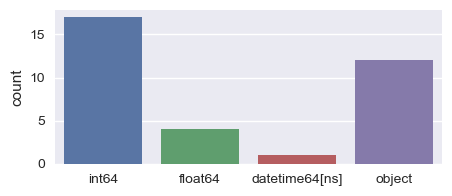

In [60]:
plt.figure(figsize=(5,2))
sns.countplot(x=df.dtypes.sort_values(ascending = True))

In [61]:
# Checking the unique values in categorical columns.
Categorical_col = list(set(df.columns)-set(df.describe()))
for col in Categorical_col:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column deposit_type are:, ['No Deposit' 'Non Refund' 'Refundable']
Unique values in column distribution_channel are:, ['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']
Unique values in column hotel are:, ['City Hotel' 'Resort Hotel']
Unique values in column arrival_date_month are:, ['July' 'August' 'September' 'December' 'October' 'November' 'January'
 'May' 'April' 'March' 'June' 'February']
Unique values in column country are:, ['PRT' 'GBR' 'BEL' 'DEU' 'ESP' 'IRL' nan 'ITA' 'FRA' 'ARG' 'USA' 'POL'
 'ROU' 'BRA' 'NOR' 'GRC' 'CN' 'CHE' 'NLD' 'RUS' 'AUS' 'SWE' 'EST' 'CZE'
 'OMN' 'FIN' 'AUT' 'DNK' 'NZL' 'HUN' 'MOZ' 'BWA' 'ISR' 'LUX' 'IDN' 'SVN'
 'ALB' 'CHN' 'MAR' 'HRV' 'AGO' 'BGR' 'IND' 'DZA' 'MEX' 'COL' 'TUN' 'KAZ'
 'IRN' 'LVA' 'STP' 'UKR' 'VEN' 'TUR' 'SMR' 'TWN' 'KOR' 'BLR' 'JPN' 'PRI'
 'SRB' 'AZE' 'LBN' 'CRI' 'THA' 'CHL' 'LTU' 'CPV' 'SVK' 'EGY' 'CMR' 'LIE'
 'MYS' 'SAU' 'ZAF' 'MMR' 'DOM' 'MKD' 'IRQ' 'SGP' 'CYM' 'ZMB' 'ZWE' 'SEN'
 'PAN' 'NGA' 'GIB' 'KNA' 'GEO' 'PER' 'JOR'

In [62]:
#Droping the three-column reservation_status_date', 'country', and 'arrival_date_month because they have a very large number of Unique Values
Categorical_col= list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df.describe()))
for col in Categorical_col:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column deposit_type are:, ['No Deposit' 'Non Refund' 'Refundable']
Unique values in column distribution_channel are:, ['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']
Unique values in column hotel are:, ['City Hotel' 'Resort Hotel']
Unique values in column meal are:, ['BB' 'HB' 'FB' 'SC' 'Undefined']
Unique values in column market_segment are:, ['Groups' 'Direct' 'Offline TA/TO' 'Online TA' 'Complementary' 'Corporate'
 'Undefined' 'Aviation']
Unique values in column reserved_room_type are:, ['A' 'E' 'D' 'H' 'G' 'C' 'F' 'B' 'L' 'P']
Unique values in column Service_rating_text are:, ['Poor' 'Excellent' 'No Rating' 'Average']
Unique values in column reservation_status are:, ['Canceled' 'Check-Out' 'No-Show']
Unique values in column assigned_room_type are:, ['A' 'E' 'D' 'H' 'G' 'C' 'F' 'B' 'I' 'L' 'K' 'P']
Unique values in column customer_type are:, ['Transient-Party' 'Transient' 'Contract' 'Group']


In [63]:
# lets add some new columns
df["total_people"] = df["adults"]+df["children"]+df["babies"]
df["total_stay"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

In [64]:
# Checking the final rows and columns
df.shape

(96090, 36)

# EDA (Exploratory Data Analysis)

# Univariate Analysis
#1) Which type of hotel is mostly prefered by the guests?

In [65]:
df["hotel"].value_counts()

City Hotel      59827
Resort Hotel    36263
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Mostly prefered Hotel by the guests')

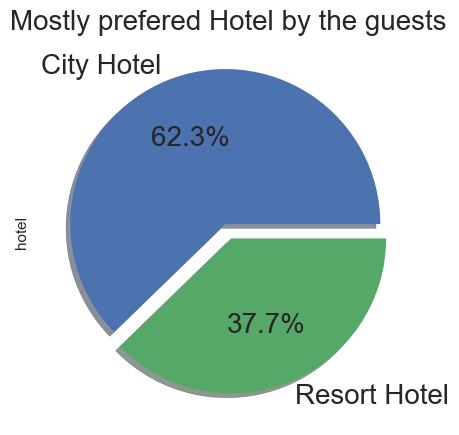

In [66]:
# visualizing the by pie chart.     #syntax plot(kind='pie'), autopct use for percentage
df["hotel"].value_counts().plot(kind='pie', autopct = '%1.1f%%', shadow=True, explode=[0.05, 0.05], figsize=(5,8),fontsize=20)
plt.title('Mostly prefered Hotel by the guests', fontsize = 20)

### **Observation**
### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

# 2) Which Agent made the most bookings?

In [67]:
#highest bookings made by agents
highest_booking = df.agent.value_counts().reset_index().rename(columns={'agent': "Most Bookings"}).sort_values(by='Most Bookings',ascending=False)

# as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
df['agent'].fillna("0", inplace = True) 

#drop
df.drop(df[df['agent']=="0"].index, inplace=True)

# taking top 10 bookings made by agent
top_ten = highest_booking[:10]

top_ten

index  Most Bookings
0    9.0          30489
1  240.0          13515
2    0.0          13366
3   14.0           3549
4    7.0           3456
5  250.0           2842
6    1.0           2095
7  241.0           1693
8   28.0           1608
9    6.0           1574

Text(0.5, 1.0, 'Most Bookings Made by the agent')

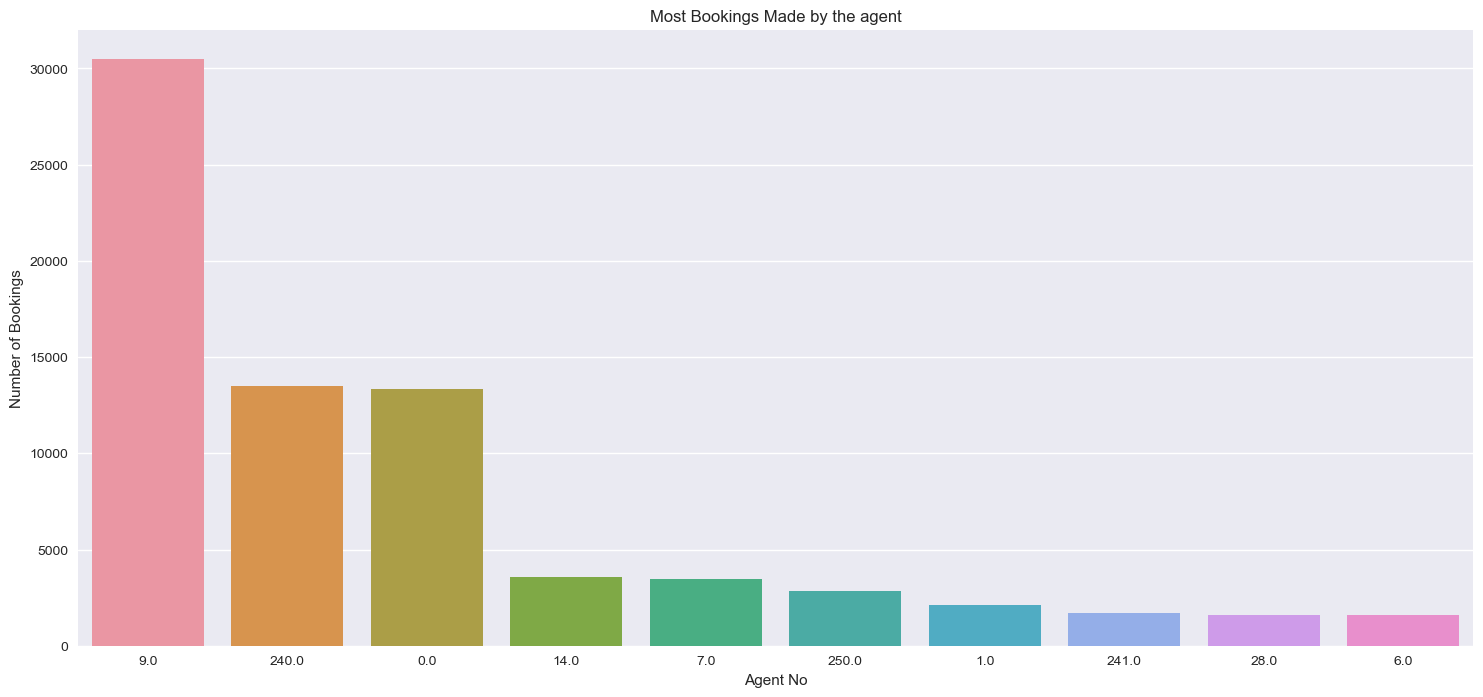

In [68]:
#Visualizaing the graph
plt.figure(figsize=(18,8))
sns.barplot(x=top_ten['index'],y=top_ten["Most Bookings"],order=top_ten['index'])
plt.xlabel("Agent No")
plt.ylabel("Number of Bookings")
plt.title("Most Bookings Made by the agent")

# **Observation**
### Agent ID no: 9 made most of the bookings

# 3)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

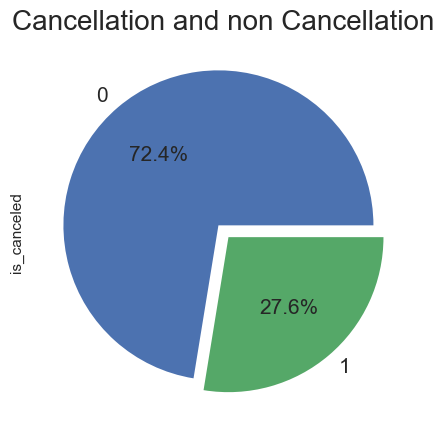

In [69]:
df["is_canceled"].value_counts().plot(kind='pie',autopct = '%1.1f%%', explode=[0.05, 0.05], figsize=(5,8),fontsize=15)
plt.title("Cancellation and non Cancellation",fontsize=20)

# **Observation :**
### 0= not cancled
### 1= canceled

### 27.6% of the bookings were cancelled.

# 4) What is the Percentage of repeated guests?

Text(0.5, 1.0, 'Percentgae (%) of repeated guests')

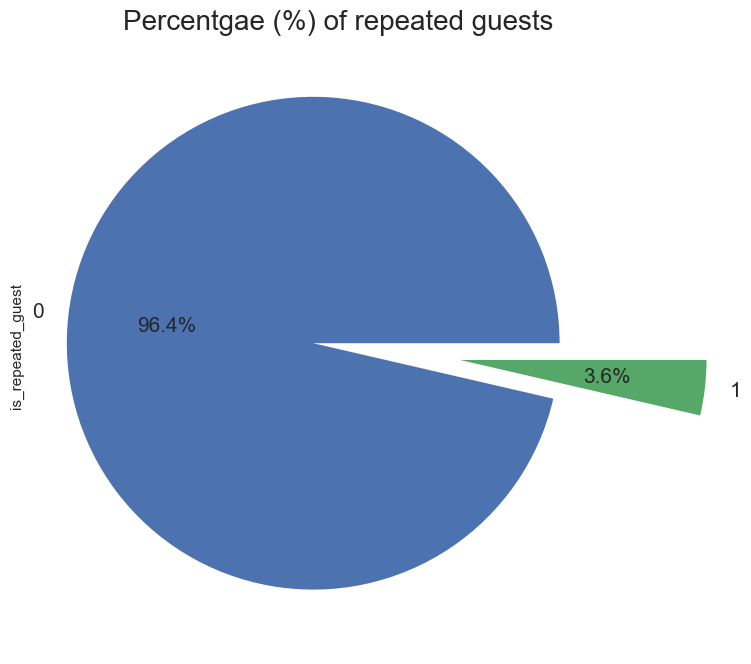

In [70]:
df["is_repeated_guest"].value_counts().plot(kind="pie", autopct='%1.1f%%',explode=[0.1,0.5],figsize=(12,8),fontsize=15)
plt.title("Percentgae (%) of repeated guests",fontsize=20)

# **Observation:**
### 0= not Repeated Guest
### 1= Repeated Guest
### Repeated guests are very few which only 3.6%.
#In order to retained the guests management should take feedbacks from guests and try to imporve the services.

# 5) What is the percentage distribution of "Customer Type"?

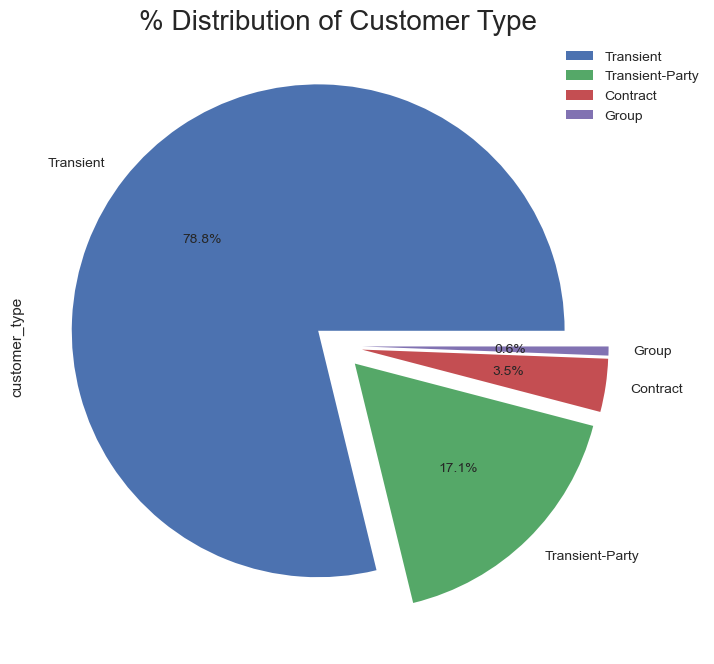

In [71]:
df["customer_type"].value_counts().plot(kind='pie', autopct ='%1.1f%%', explode=[0.1]*4, figsize=(12,8),fontsize=10)
plt.title("% Distribution of Customer Type",fontsize=20)
labels=df1['customer_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

 **1. Contract** 
>when the booking has an allotment or other type of contract associated to it

**2. Group**
> when the booking is associated to a group

**3. Transient**
>when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**
>when the booking is transient, but is associated to at least other transient booking

### **Observation:**
### Transient customer type is more which is 78.8 %. percentage of  Booking associated by the Group is vey low.

# 6)What is the percentage distribution of required_car_parking_spaces?

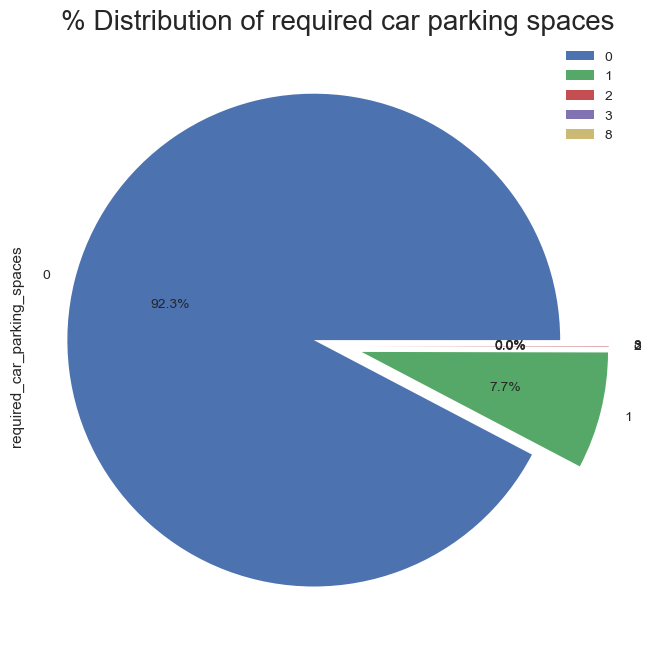

In [72]:
df['required_car_parking_spaces'].value_counts().plot(kind='pie', autopct ='%1.1f%%',explode=[0.1]*5, figsize=(12,8),fontsize=10)
labels=df['required_car_parking_spaces'].value_counts().index.tolist()
plt.title('% Distribution of required car parking spaces', fontsize=20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**
### 92.3 % guests did not required the parking space. only 7.7 % guests required only 1 parking space.

# 7)What is the percentage of booking changes made by the customer.?

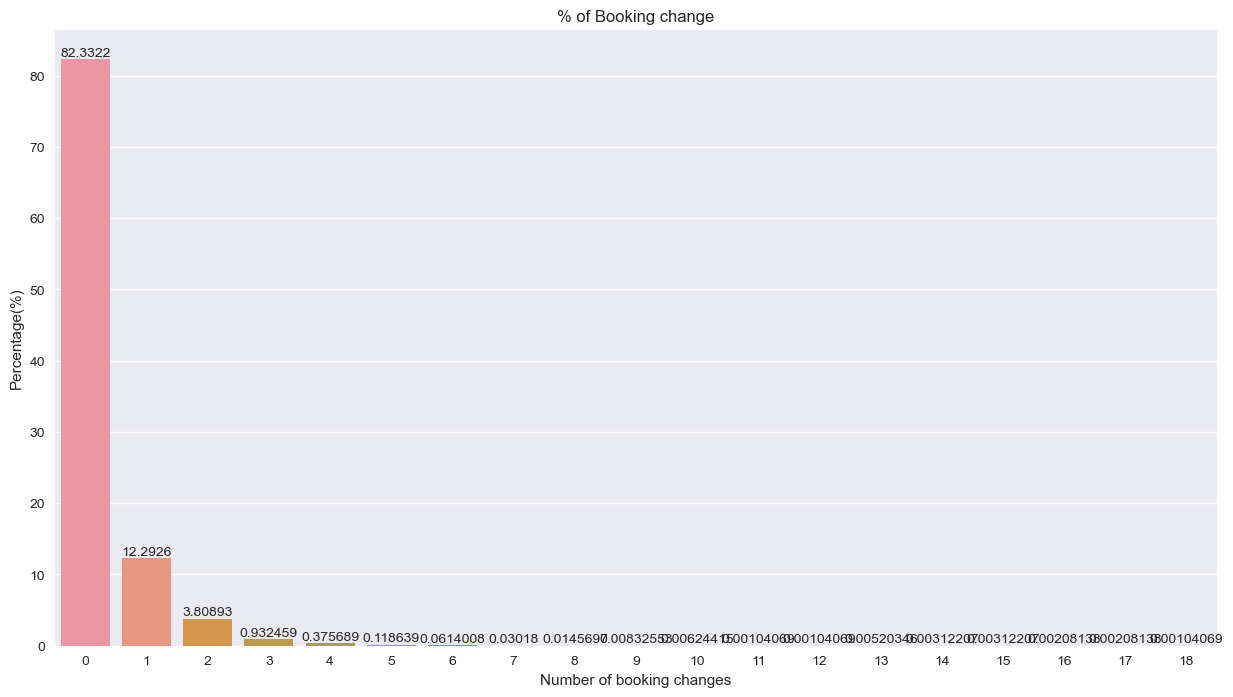

In [73]:
booking_changes = df.booking_changes.value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})
plt.figure(figsize=(15,8))
ax = sns.barplot(x=booking_changes["number_booking_changes"],y=booking_changes["Counts"]*100/df.shape[0])     
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

for i in ax.containers:
    ax.bar_label(i,)

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

### **Observation**
### Almost 82.3% of the bookings were not changed by guests.


# 8)What is Percentage distribution of Deposite type ?

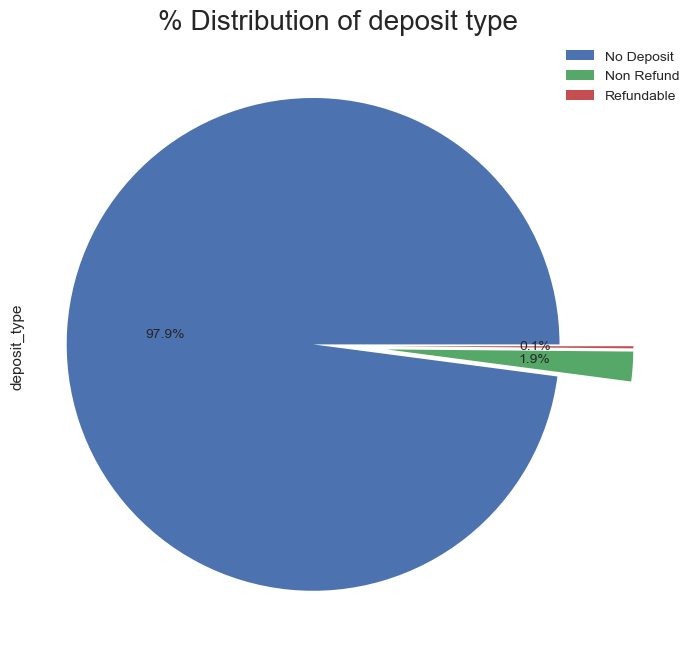

In [74]:
df['deposit_type'].value_counts().plot(kind="pie", autopct ='%1.1f%%',explode=[0.1,0.2,0.2],figsize=(12,8),fontsize=10,labels=None)
plt.title("% Distribution of deposit type", fontsize = 20)
labels = df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# **Observation**
### 97.9 % of the guests prefer "No deposit" type of deposit.

# 9) Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

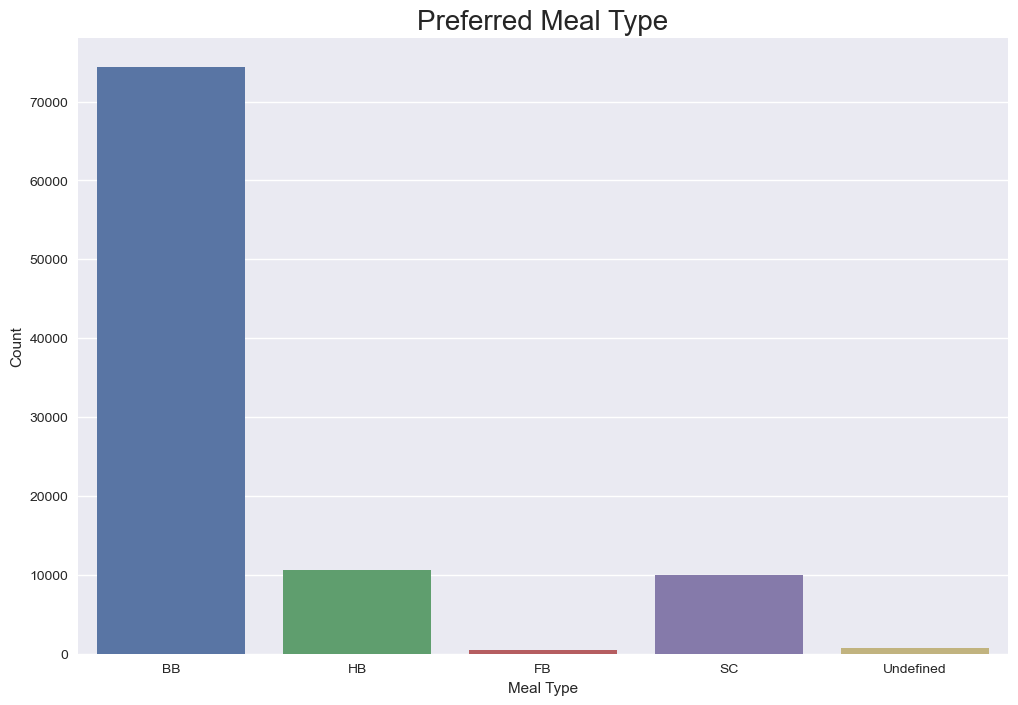

In [75]:
#df["meal"].value_counts().plot(kind="pie",autopct = '%1.1f%%',explode=[0.05,0.1,0.1,0.7,0.3],figsize=(20,8),fontsize=10)
#labels = df["meal"].value_counts().index.tolist()
#plt.legend(bbox_to_anchor=(1,1),loc= "upper left",labels=labels)
plt.figure(figsize=(12,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type",fontsize=20)



Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
### **Observation**
### * So the most preferred meal type by the guests is BB( Bed and Breakfast) 
### * HB- (Half Board) and SC- (Self Catering) are equally preferred.

# 10) From which country the most guests are coming?

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

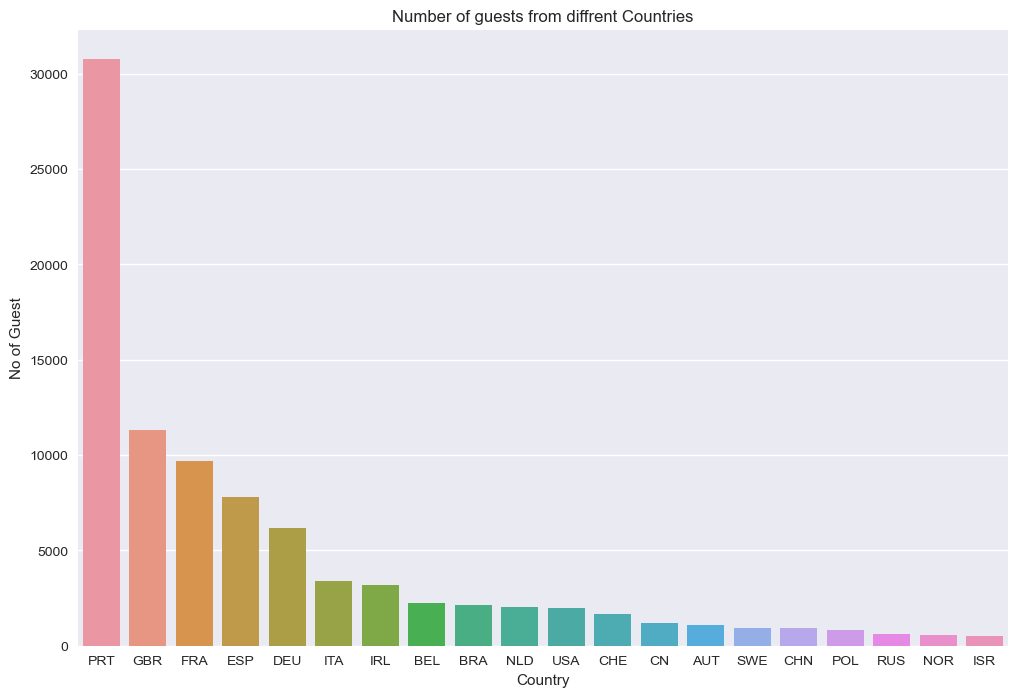

In [76]:
# Counting the guests from various countries.
country_df = df['country'].value_counts().reset_index().rename(columns={'index':"Country",'country':"count"})[:20]
#country_df = df['country'].value_counts().reset_index().rename(columns={'index':"Country",'country':"count"})
plt.figure(figsize=(12,8))
sns.barplot(x=country_df['Country'],y=country_df["count"])
plt.xlabel("Country")
plt.ylabel("No of Guest")
plt.title("Number of guests from diffrent Countries")


In [77]:
#!pip install folium #importing the folium library
import folium 
import plotly.express as px

In [78]:
basemap = folium.Map()
plt.figure(figsize=(10,10))
guests_map = px.choropleth(country_df, locations = country_df['Country'],color = country_df['count'], hover_name = country_df['Country'])
guests_map.show()

<Figure size 1000x1000 with 0 Axes>

# **Observation**
### Most of the guests are coming from portugal i.e more 25000 guests are from portugal
abbreevations for countries-



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





# 11) Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

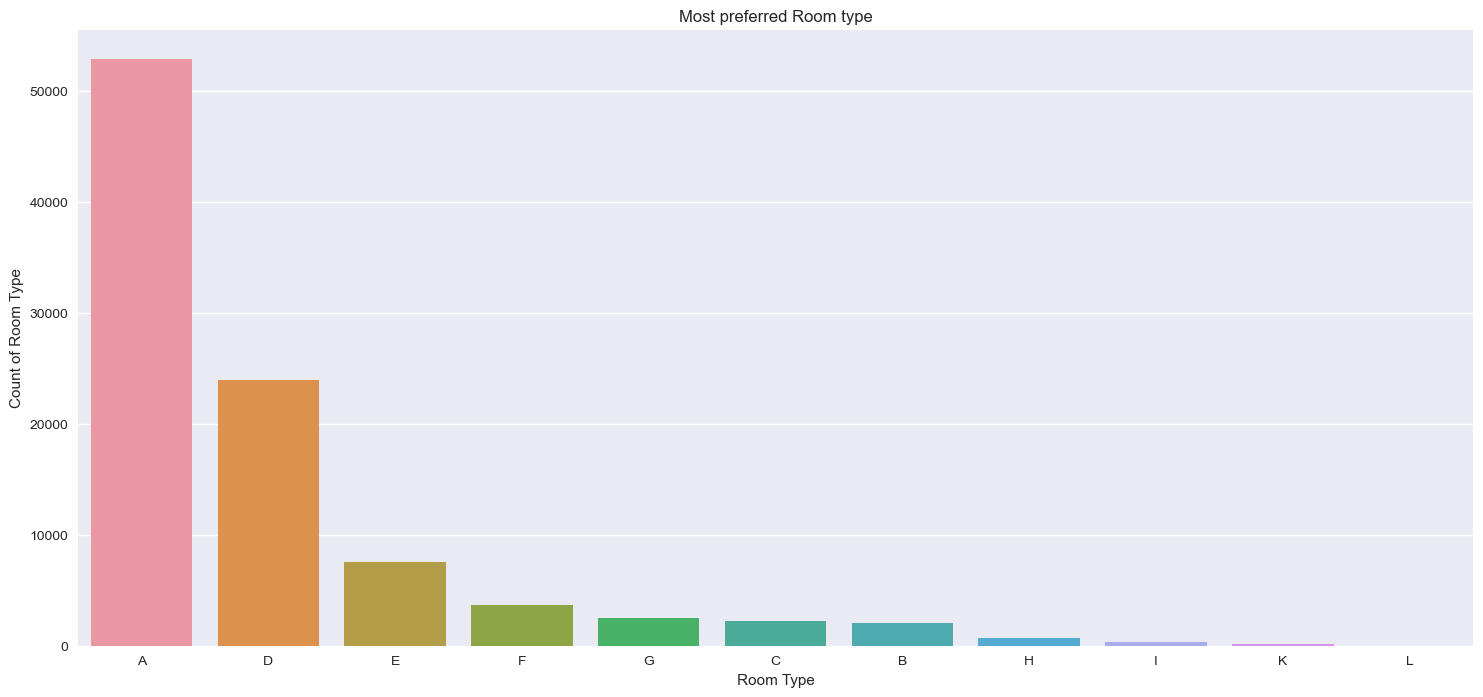

In [79]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

# **Observation**
###So the most preferred Room type is "A".

# 12)In which month most of the bookings happened?

In [80]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

arrival_date_month  Counts
4             January    5929
3            February    8068
7               March    9794
0               April   11089
8                 May   11791
6                June   10939
5                July   12661
1              August   13877
11          September   10508
10            October   11160
9            November    6794
2            December    6780

Text(0, 0.5, 'Number of bookings')

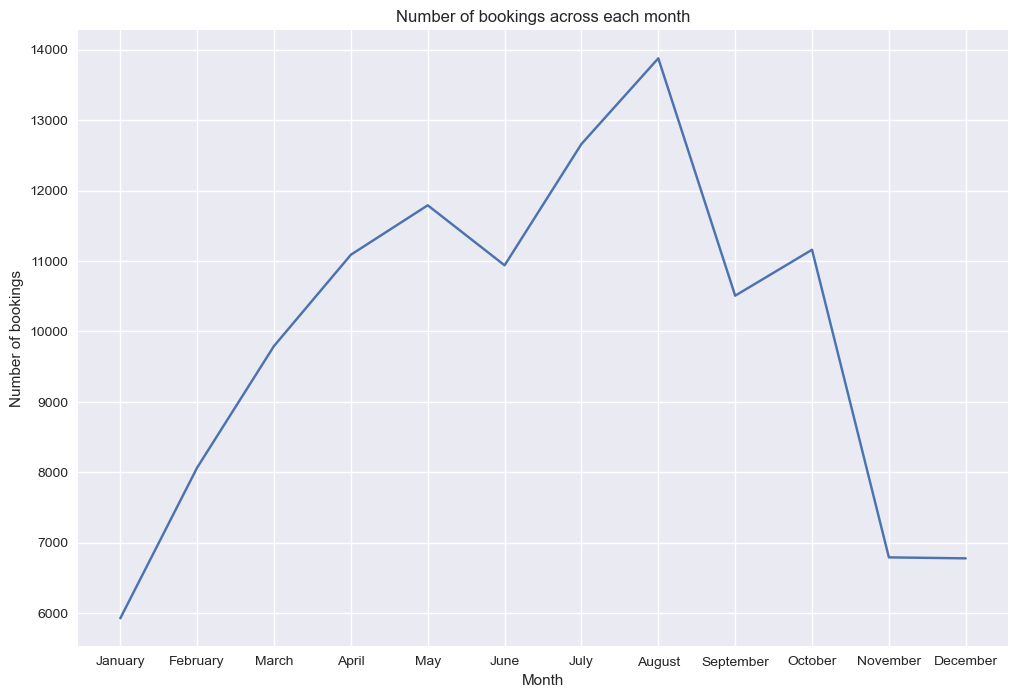

In [81]:
# set plot size
plt.figure(figsize=(12,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

# ### **Observation**
 July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

# 13) Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

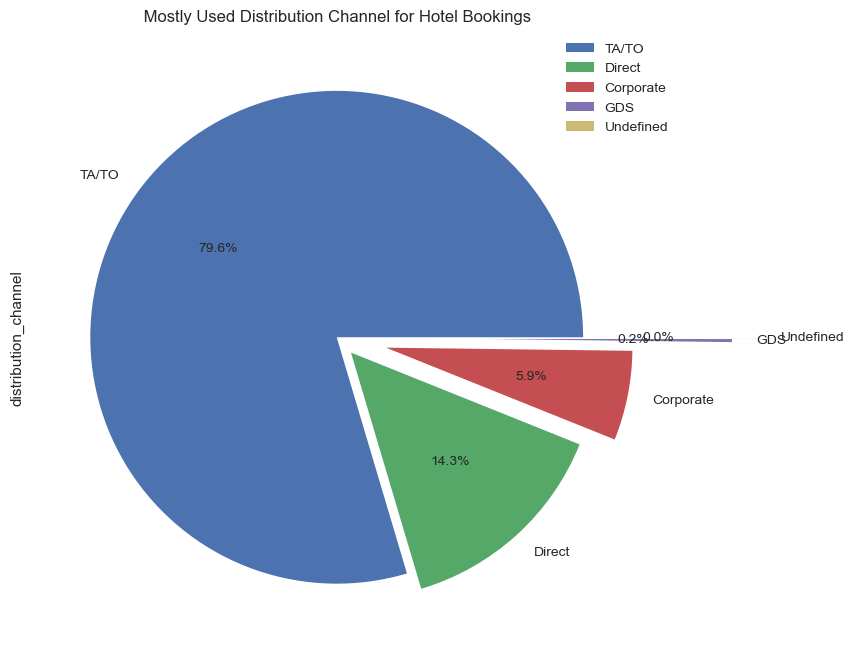

In [82]:
# visualizing the by pie chart.


#Creating labels
labels=df['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df['distribution_channel'].value_counts().plot(kind="pie", autopct ='%1.1f%%',explode=[0.005, 0.08,0.2,0.6,0.7], figsize=(15,8),fontsize=10)   

# setting legends w
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

# **Observation**:
###'TA/TO' is mostly(79.6%) used for booking hoetls.

# 14) Which year had the highest bookings?

Text(0.5, 1.0, 'Year wise Bookings')

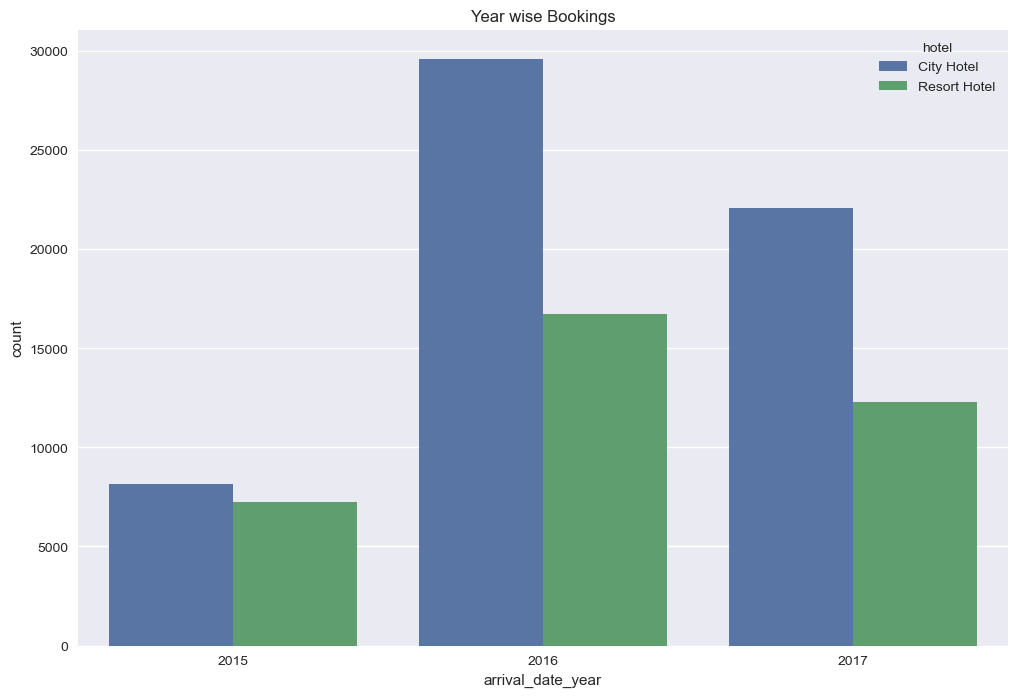

In [83]:
# set plot size
plt.figure(figsize =(12,8))

#plot with coutplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year wise Bookings")

# **Observation**
###2016 had the higest bookings.
###2015 had less bookings.
###overall City hotels had the most of the bookings.

# 15) Rating by Customer

In [84]:
rating=df.groupby(["Service_rating","Service_rating_text"]).size().reset_index().rename(columns={0 :"count"})
rating

Service_rating Service_rating_text  count
0               0           No Rating   7306
1               1                Poor  33360
2               2                Poor  33512
3               3             Average   7351
4               4             Average   7308
5               5           Excellent   7253

<AxesSubplot:xlabel='Service_rating_text', ylabel='count'>

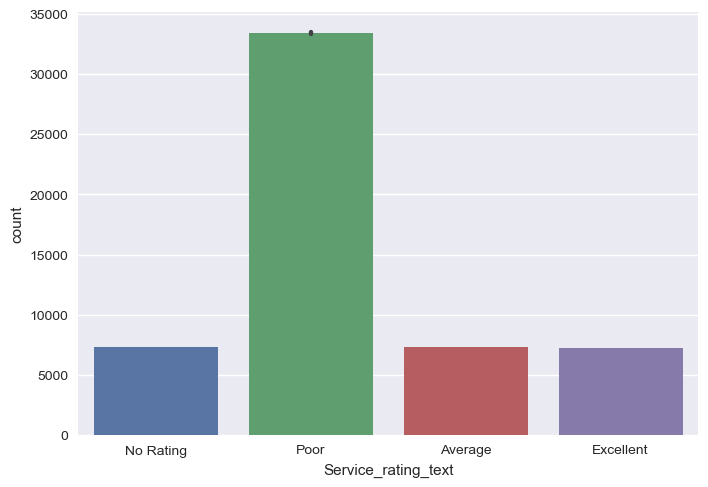

In [85]:
sns.barplot(x="Service_rating_text",y="count",data = rating)

# Observation

Asking for Suggestion how we improve the hotel Service.

<AxesSubplot:xlabel='Service_rating', ylabel='count'>

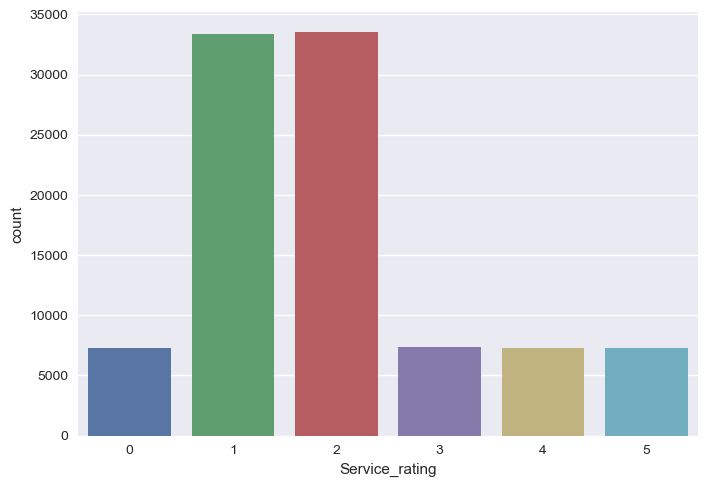

In [86]:
sns.barplot(x="Service_rating",y="count",data = rating)

# 15) Which Hotel have poor Rating

In [87]:
rating_hotel=df.groupby(["hotel","Service_rating_text"]).size().reset_index().rename(columns={0 :"count"})
rating_hotel

hotel Service_rating_text  count
0    City Hotel             Average   8901
1    City Hotel           Excellent   4389
2    City Hotel           No Rating   4427
3    City Hotel                Poor  42110
4  Resort Hotel             Average   5758
5  Resort Hotel           Excellent   2864
6  Resort Hotel           No Rating   2879
7  Resort Hotel                Poor  24762

Text(0.5, 1.0, 'Rating By Hotel')

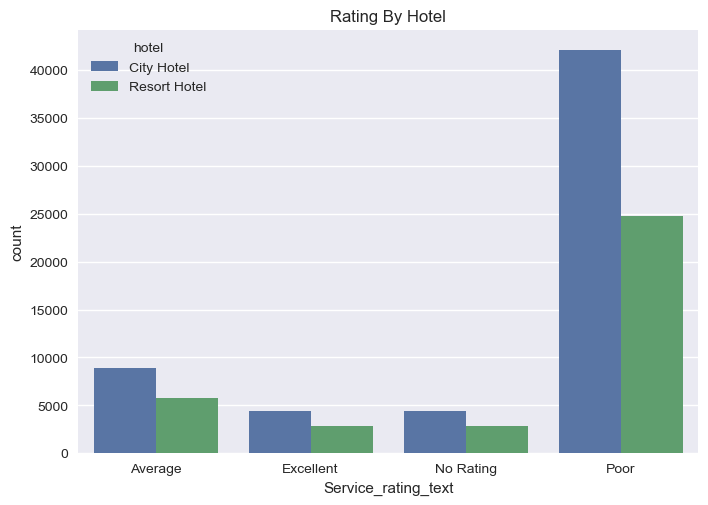

In [88]:
sns.barplot(x="Service_rating_text",y="count",hue='hotel',data = rating_hotel)
plt.title("Rating By Hotel")

# City Hotel have most Poor Rating. they want to ask for suggestion that How we Improve the our Hotel Services

# Bivariate and Multivariate Analysis

In [89]:
# group by hotel
group_hotel=df.groupby('hotel')
# for hotel, hotel_df in group_hotel:
#     print(hotel)
#     print(hotel_df)

In [90]:
group_hotel.get_group("City Hotel") #seeing the data which grouped by "City Hotel"

hotel  is_canceled  lead_time  arrival_date_year  \
0       City Hotel            1        265               2015   
1       City Hotel            1        258               2015   
2       City Hotel            1        258               2015   
21      City Hotel            1        265               2015   
22      City Hotel            1        265               2015   
...            ...          ...        ...                ...   
119353  City Hotel            0         23               2017   
119369  City Hotel            0        102               2017   
119370  City Hotel            0         34               2017   
119371  City Hotel            0        109               2017   
119372  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        28   
1                    July                        27   
2                    July                        27   
21                   July                        28   
22                   July                        28   
...                   ...                       ...   
119353             August                        35   
119369             August                        35   
119370             August                        35   
119371             August                        35   
119372             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               9                        0   
1                               2                        0   
2                               2                        0   
21                              9                        0   
22                              9                        0   
...                           ...                      ...   
119353                         30                        2   
119369                         31                        2   
119370                         31                        2   
119371                         31                        2   
119372                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          2       2       0.0       0   BB     PRT   
1                          2       2       0.0       0   BB     PRT   
2                          2       2       0.0       0   BB     PRT   
21                         2       2       0.0       0   BB     PRT   
22                         2       2       0.0       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119353                     5       2       0.0       0   BB     BEL   
119369                     5       3       0.0       0   BB     FRA   
119370                     5       2       0.0       0   BB     DEU   
119371                     5       2       0.0       0   BB     GBR   
119372                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Groups                TA/TO                  1   
1              Groups                TA/TO                  1   
2              Groups                TA/TO                  1   
21             Groups                TA/TO                  1   
22             Groups                TA/TO                  1   
...               ...                  ...                ...   
119353  Offline TA/TO                TA/TO                  0   
119369      Online TA                TA/TO                  0   
119370      Online TA                TA/TO                  0   
119371      Online TA                TA/TO                  0   
119372      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                           21                               0   
1                            1                              

# 1) Which Hotel type has  the highest ADR?

In [91]:
#grouping by hotel adr
highest_adr = group_hotel["adr"].mean().reset_index()
highest_adr

hotel         adr
0    City Hotel  109.628650
1  Resort Hotel   97.490954

<AxesSubplot:title={'center':'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

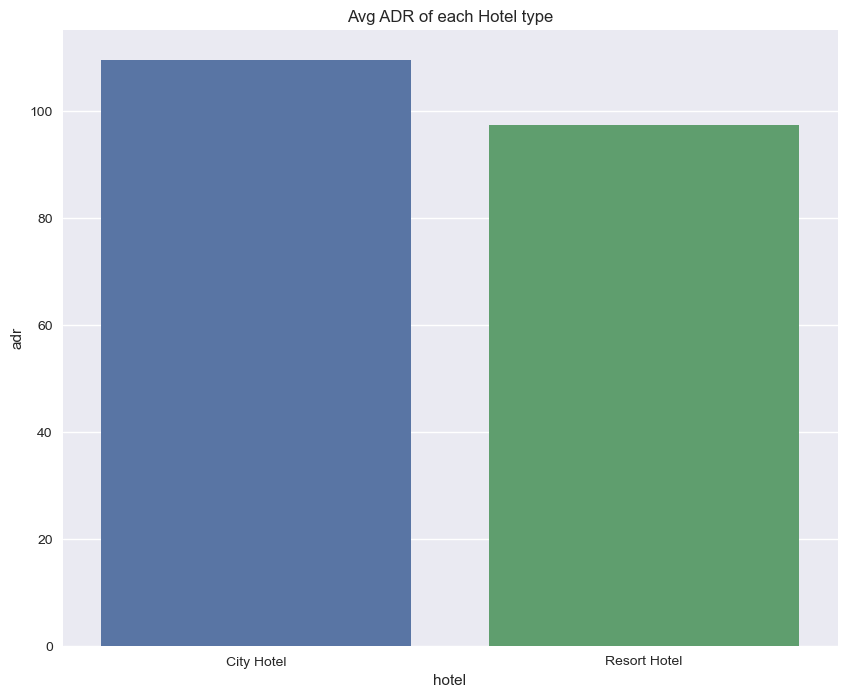

In [92]:
#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

# **Observation**
### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# 2) Which hotel type has the more lead time?

In [93]:
#group by hotel and taking mean of lead time
avg_lead_time=group_hotel['lead_time'].mean().reset_index()
avg_lead_time

hotel  lead_time
0    City Hotel  83.361827
1  Resort Hotel  85.888674

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

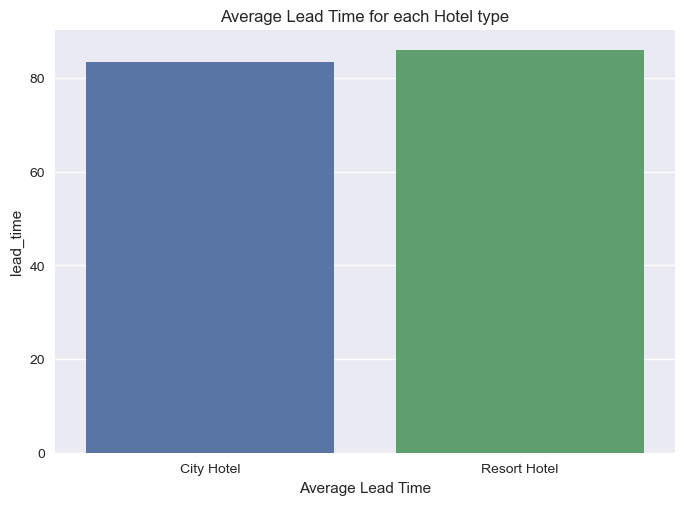

In [94]:
# visualizing the Hotel Lead Time
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])

plt.xlabel('Hotel')
plt.xlabel('Average Lead Time')
plt.title("Average Lead Time for each Hotel type")



# **Observation**
###Resort hotels has slightly  high avg lead time. That means customers plan their trips very early. 

# 3) Which hotel has highest percentage of booking cancellation?
# booking canceled=1 
# booking not canceled= 0

In [95]:
# creating new DataFrame where bookings are cancelled.
cancel_df = df[df['is_canceled']==1]

# Grouping by hotel
cancel_df=cancel_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})
cancel_df


hotel  no_of_cancelled_bookings
0    City Hotel                     17936
1  Resort Hotel                      8555

In [96]:
# adding 'total booking column for calculating the percentage.
cancel_df['total_booikngs']=df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
cancel_df

hotel  no_of_cancelled_bookings  total_booikngs
0    City Hotel                     17936           59827
1  Resort Hotel                      8555           36263

Text(0.5, 1.0, 'Percentage of booking cancellation')

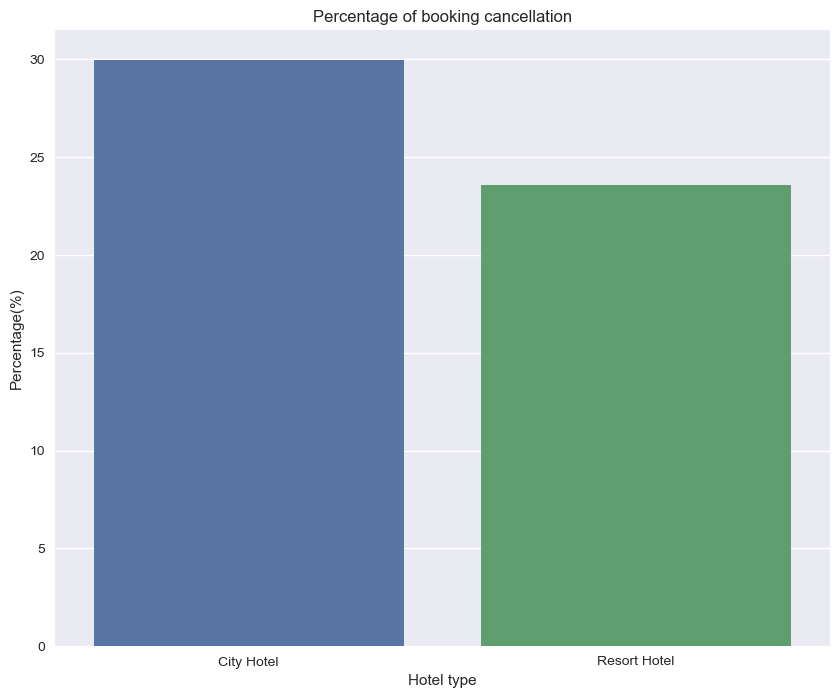

In [97]:
# visualizing the highest percentage of booking cancellation
#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=cancel_df['hotel'],y=cancel_df['no_of_cancelled_bookings']*100/cancel_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

# City Hotel has Higher Booking Cancellation rate 

# 4)Which hotel has longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

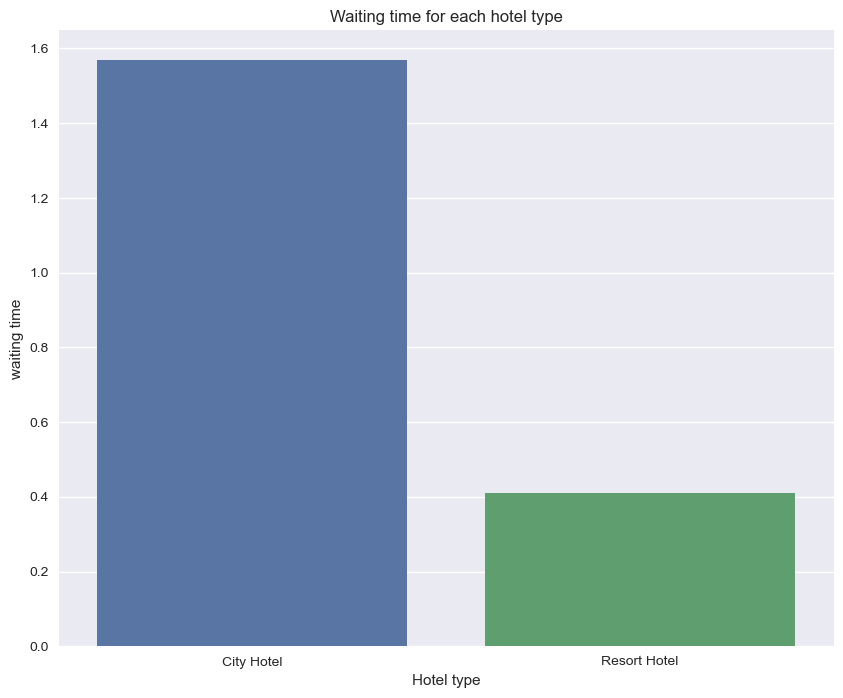

In [98]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

###**Observation**
### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

# 5) Which Hotels has the most repeated guests?
# repeated guest=1
# not repeated guest=0


Text(0.5, 1.0, 'Most repeated guests for each hotel')

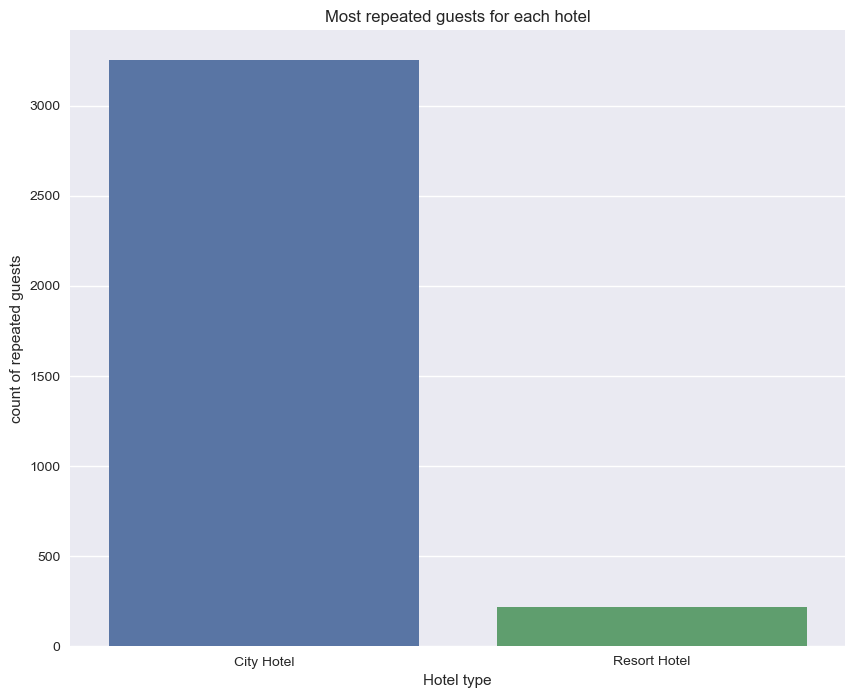

In [99]:
#groupby hotel
repeated_guests_df=df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

# **Observation**
###City Hotel has more repeated guests than the Resort Hotels.

# ADR across the different month.

In [100]:
#groupby
bookings_by_months_df=df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df


arrival_date_month         hotel         adr
8             January    City Hotel   84.410945
9             January  Resort Hotel   49.101413
6            February    City Hotel   88.401956
7            February  Resort Hotel   54.281052
15              March  Resort Hotel   57.179823
14              March    City Hotel   94.537601
0               April    City Hotel  115.783847
1               April  Resort Hotel   78.639258
17                May  Resort Hotel   79.808655
16                May    City Hotel  125.936047
13               June  Resort Hotel  111.490422
12               June    City Hotel  122.312126
11               July  Resort Hotel  155.631418
10               July    City Hotel  117.955638
3              August  Resort Hotel  186.943367
2              August    City Hotel  122.655943
22          September    City Hotel  116.406068
23          September  Resort Hotel   99.254634
20            October    City Hotel  105.224763
21            October  Resort Hotel   63.020921
18           November    City Hotel   89.259875
19           November  Resort Hotel   48.633825
5            December  Resort Hotel   66.662404
4            December    City Hotel   91.712066

Text(0, 0.5, 'ADR')

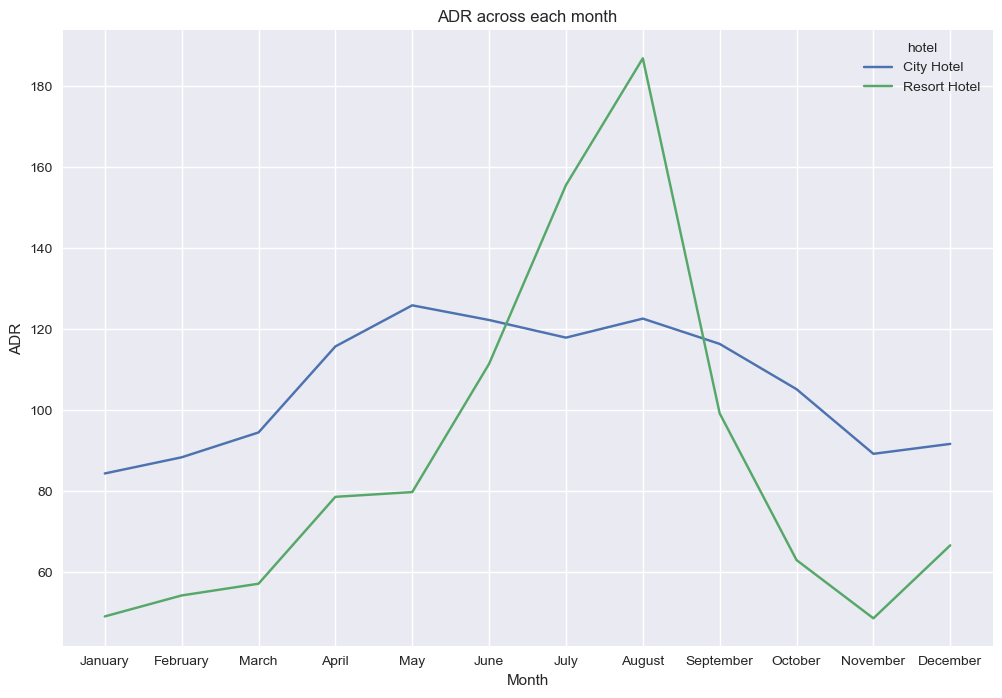

In [101]:
# set plot size and plot the line
plt.figure(figsize=(12,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

# **Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

# 7)Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

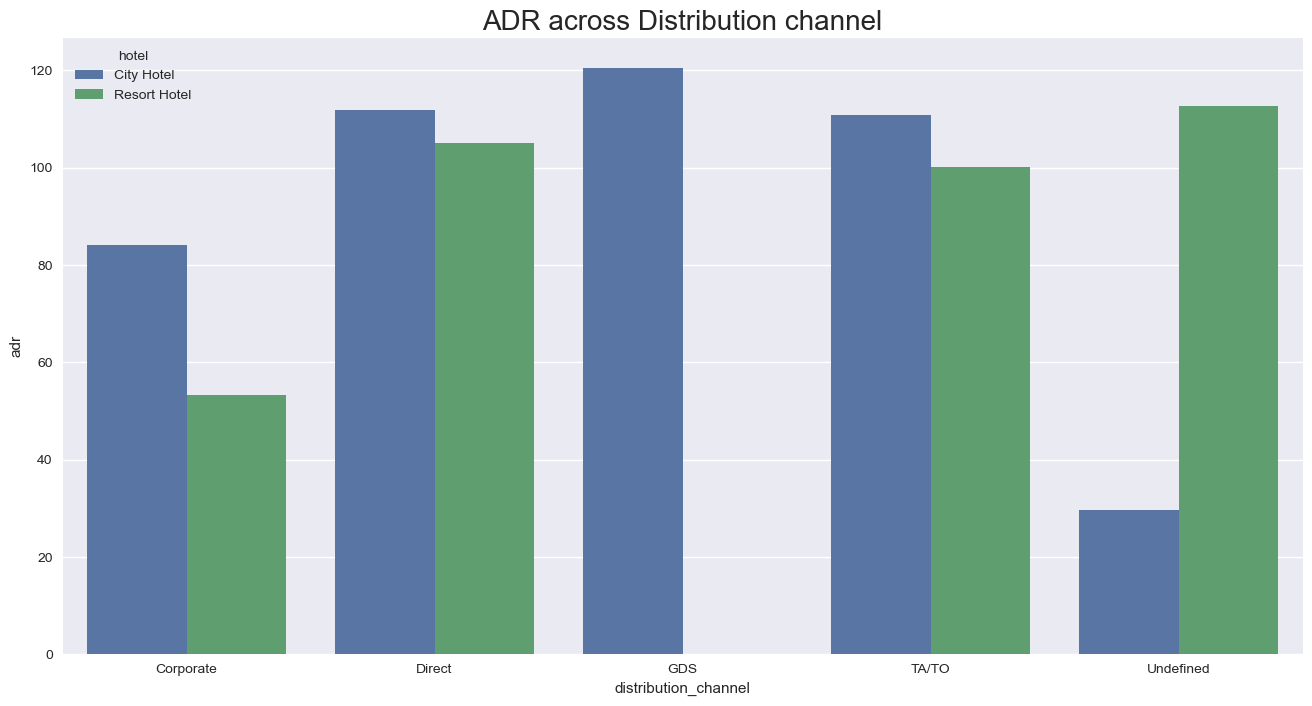

In [102]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel',fontsize=20)

# * Corporate- These are corporate hotel booing companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

# **Observation**
### From the plot is clear that 
### 'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
###  GDS has highly contributed in adr in 'City Hotel' type.
### GDS needs to increase Resort Hotel bookings.

# 8) Which distribution channel has the higest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

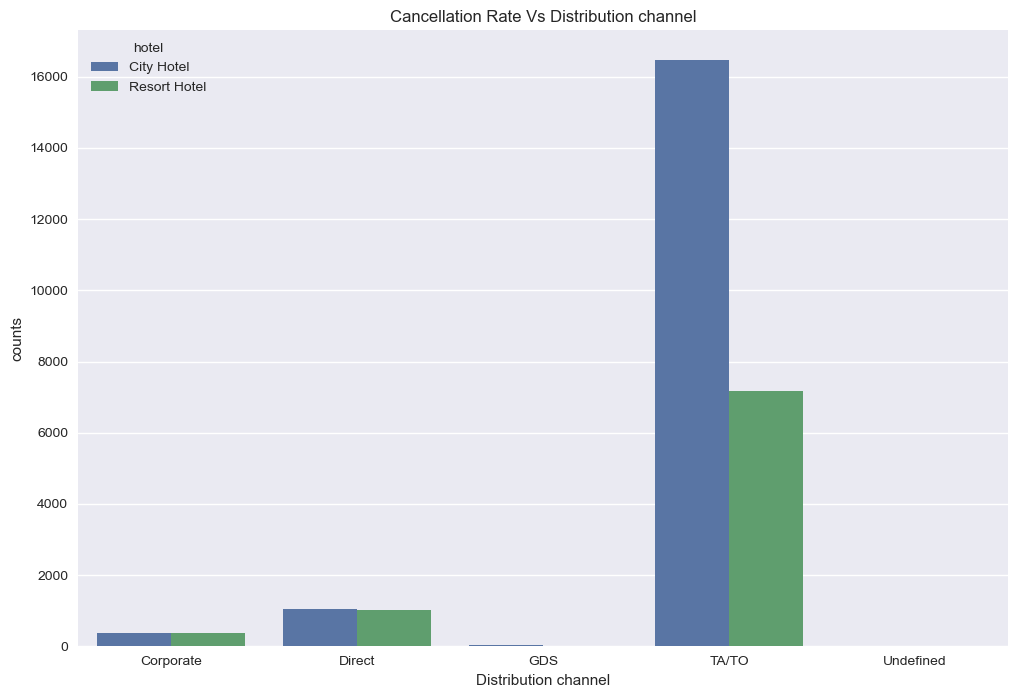

In [103]:
canceled_df=df[df['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

# **Observation**

* In "TA/TO", City hotels has the high cancellation rate compared to resort 
hotels.
* In "direct" both the hotels has almost same cancellation rate.

# 9)Which Market Segment  has the higest cancellation rate?

In [104]:
market_segment_df=df[df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

market_segment         hotel  counts
0        Aviation    City Hotel      48
1   Complementary    City Hotel      55
2   Complementary  Resort Hotel      32
3       Corporate    City Hotel     297
4       Corporate  Resort Hotel     276
5          Direct    City Hotel     977
6          Direct  Resort Hotel     851
7          Groups    City Hotel    1493
8          Groups  Resort Hotel     642
9   Offline TA/TO    City Hotel    1728
10  Offline TA/TO  Resort Hotel     865
11      Online TA    City Hotel   13336
12      Online TA  Resort Hotel    5889
13      Undefined    City Hotel       2

Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

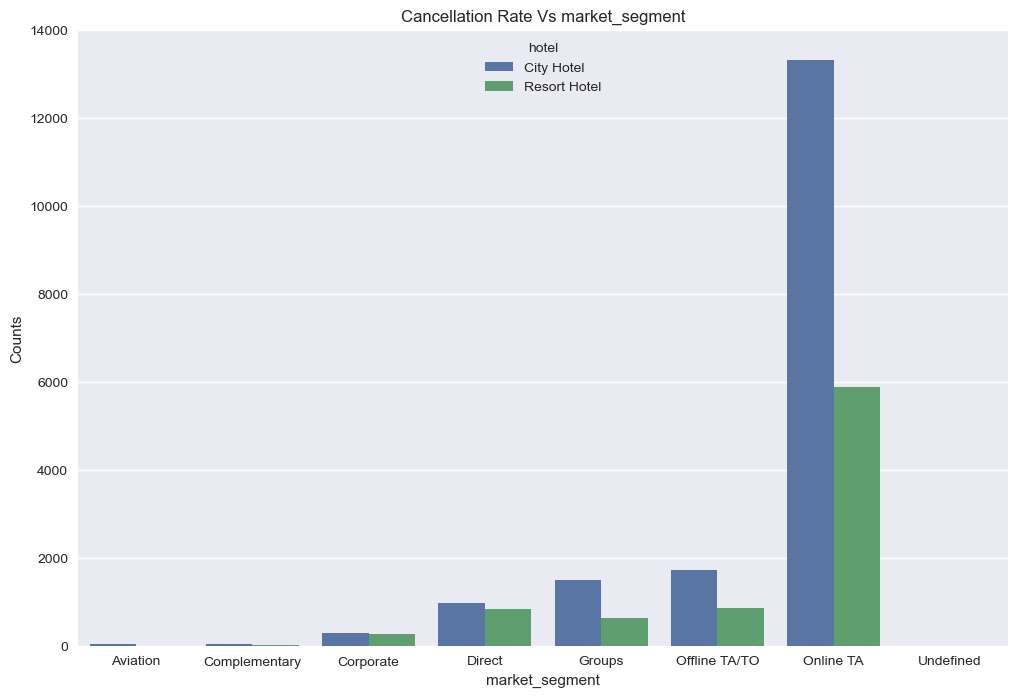

In [105]:
#set plotsizde and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

# **Observation** 
### 'Online T/A' has the highest cancellation in both type of cities
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

# 10) Does the guests alloted with the same room type which was reserved by them?

In [106]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  


([<matplotlib.axis.XTick at 0x170ea03cb80>,
 [Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')])

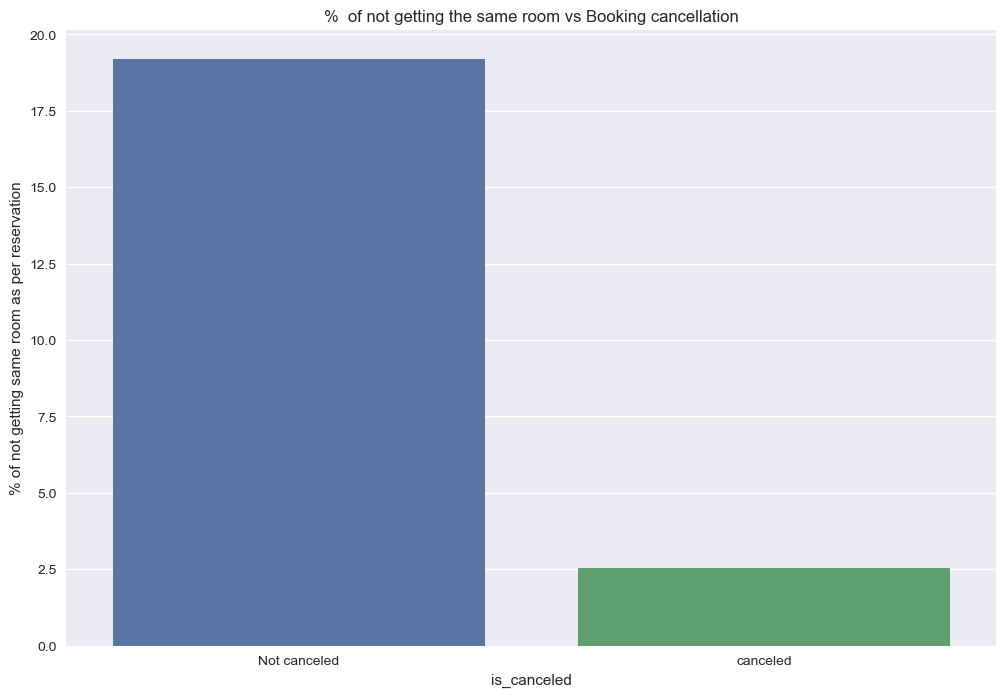

In [107]:
# create new column to df
df['Same_room_alloted_or_not']=df.apply(lambda x: same_room_allotment(x),axis=1) #axis 1 is for the columns and 0 for the rows

#groupby is canceled
grp_by_canceled_df=df.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

# **Obseravtion**


### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


# 11) ADR across different  market segment


Text(0.5, 1.0, 'Adr across market segment')

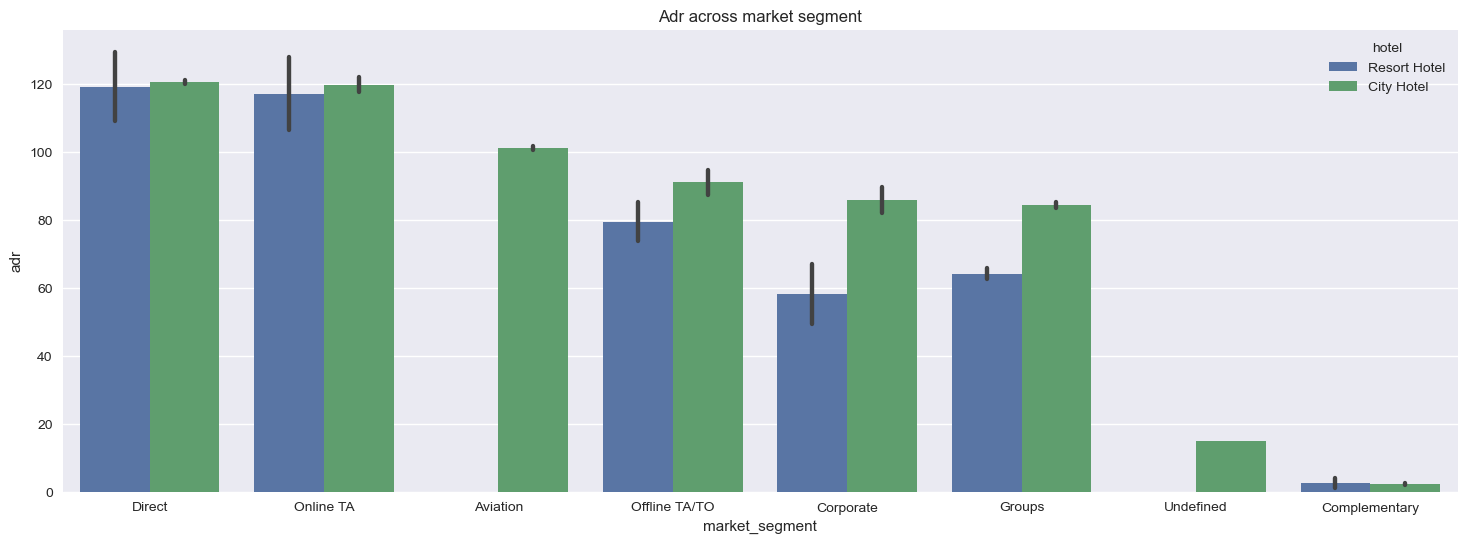

In [108]:
Grupby=df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

# **Obseravtion**
### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'

# 12)What is the Optimal stay length in both types of hotels ?

In [109]:
stay = df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns


Text(0.5, 0, 'total_stay(days)')

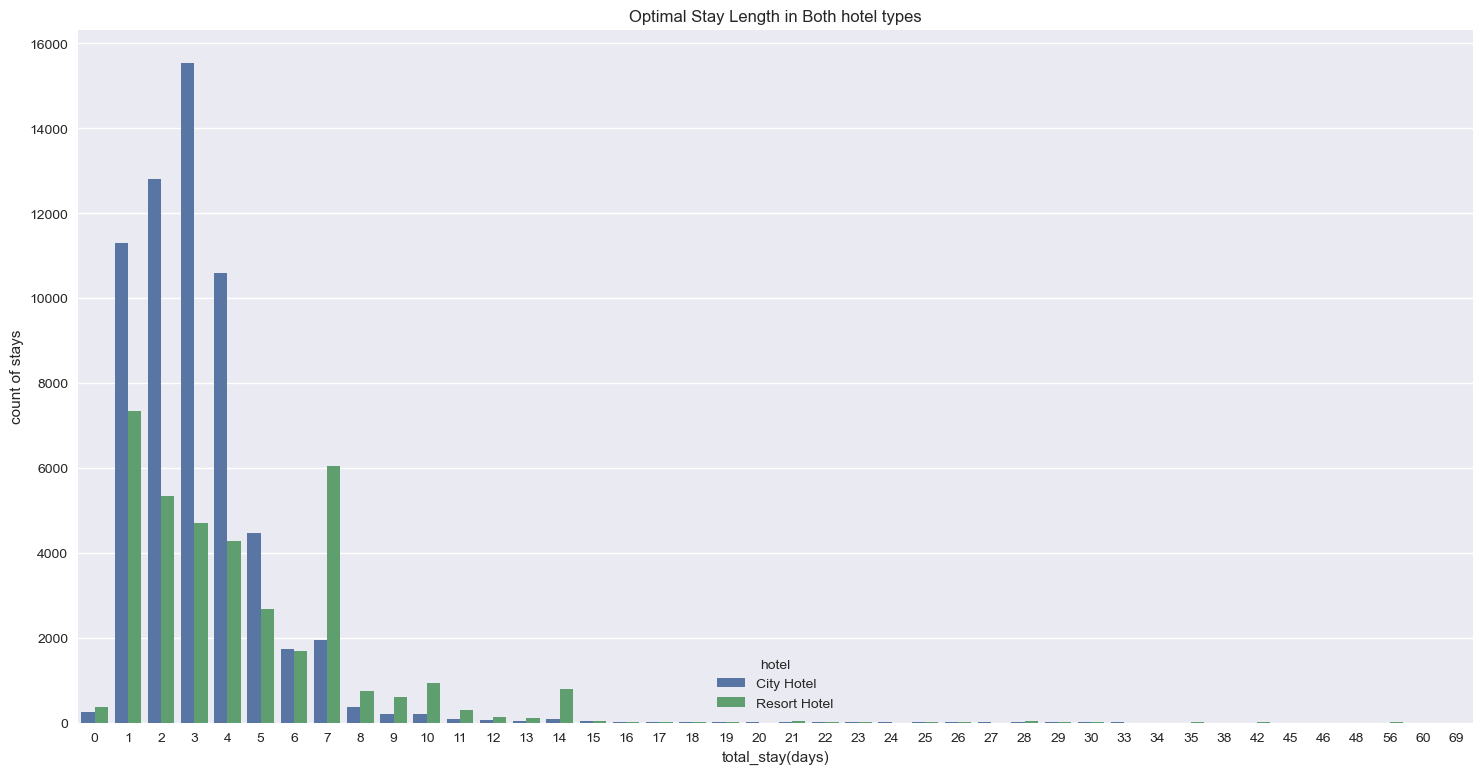

In [110]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

# **Observation:**
Optimal stay in both the type hotel is less than 7 days.

# 13)Relationship between ADR and total stay.

In [111]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = df.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

total_stay     adr         hotel
0               0    0.00    City Hotel
1               0    0.00  Resort Hotel
2               1    0.00    City Hotel
3               1    0.00  Resort Hotel
4               1    1.00    City Hotel
...           ...     ...           ...
17995           7  212.06    City Hotel
17996           7  212.10  Resort Hotel
17997           7  212.14  Resort Hotel
17998           7  212.29    City Hotel
17999           7  212.29  Resort Hotel

[18000 rows x 3 columns]

Text(0.5, 1.0, 'Relationship between adr and total stay')

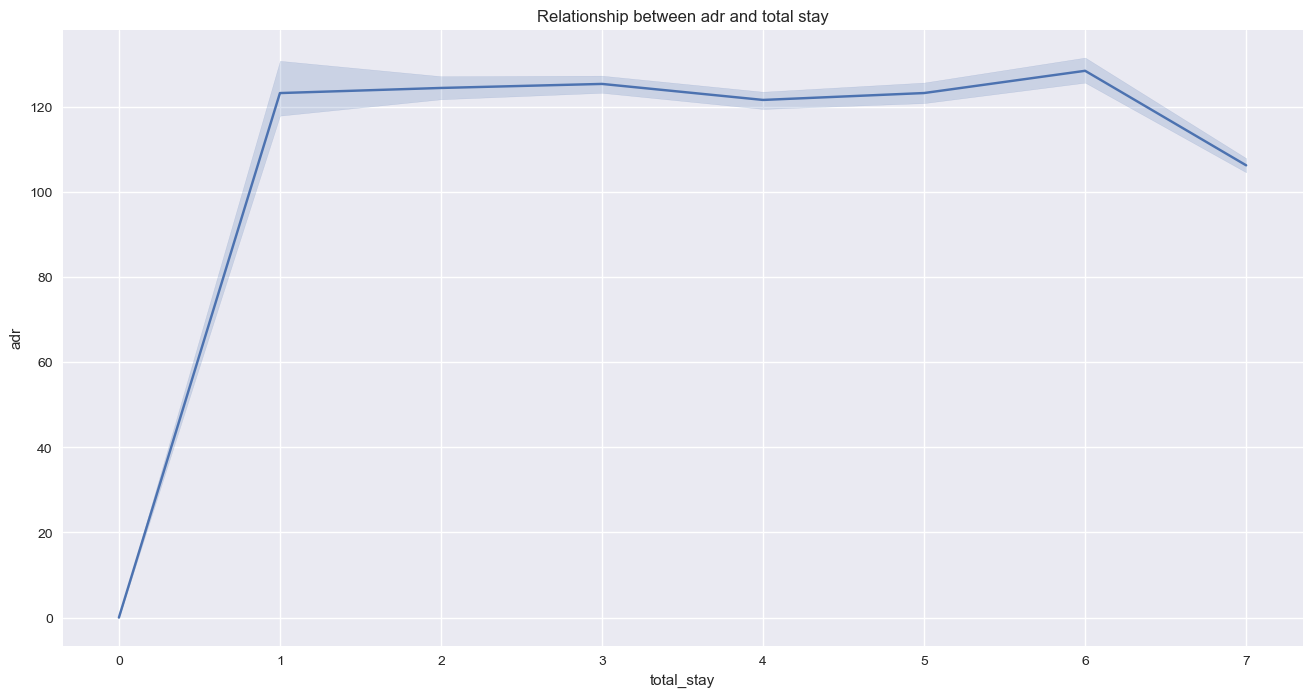

In [112]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

# As the total stay increases the  adr also increases.

# Correlation of the columns

Text(0.5, 1.0, 'Co-relation of the columns')

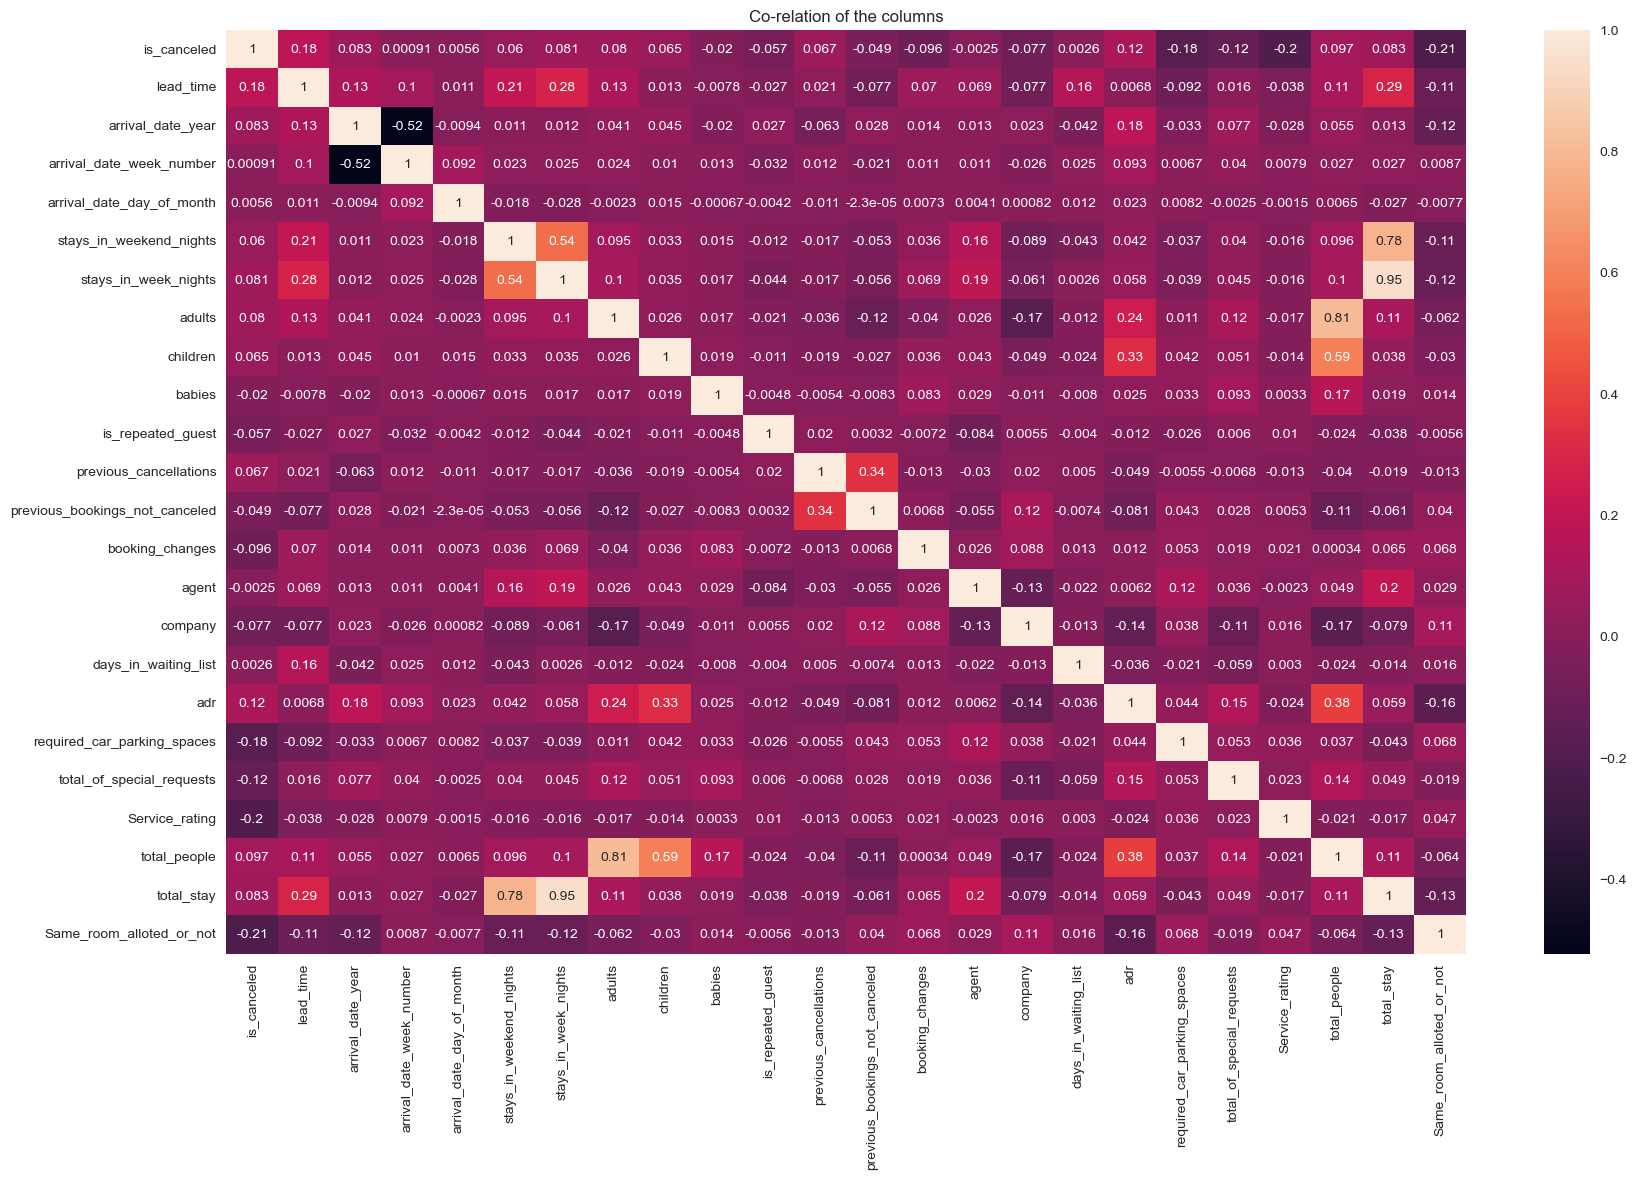

In [113]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

###1) is_canceled and same_room_alloted_or_not are negatively corelated. That means  customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
###2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
###3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.
###4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

# Relationship between the  repeated guests and previous bookings not canceled.?

In [114]:
repeated_guests_df=df[df['is_repeated_guest']==1]
repeated_guests_df_1=df[df['is_repeated_guest']==0]

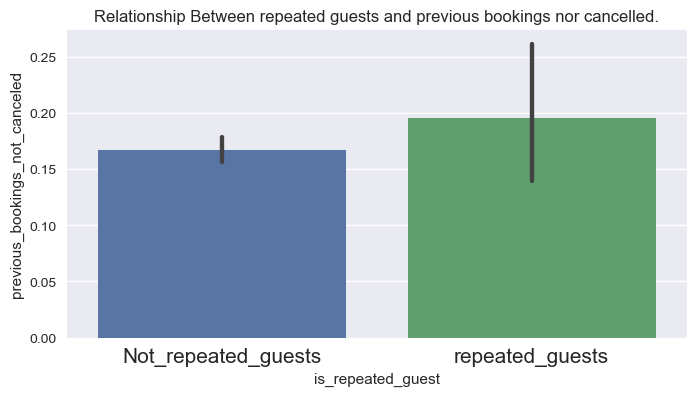

In [115]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['is_repeated_guest'],y= df['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

### **Observation**
###Not Repeated guests are more likely to cancel their bookings.

In [116]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

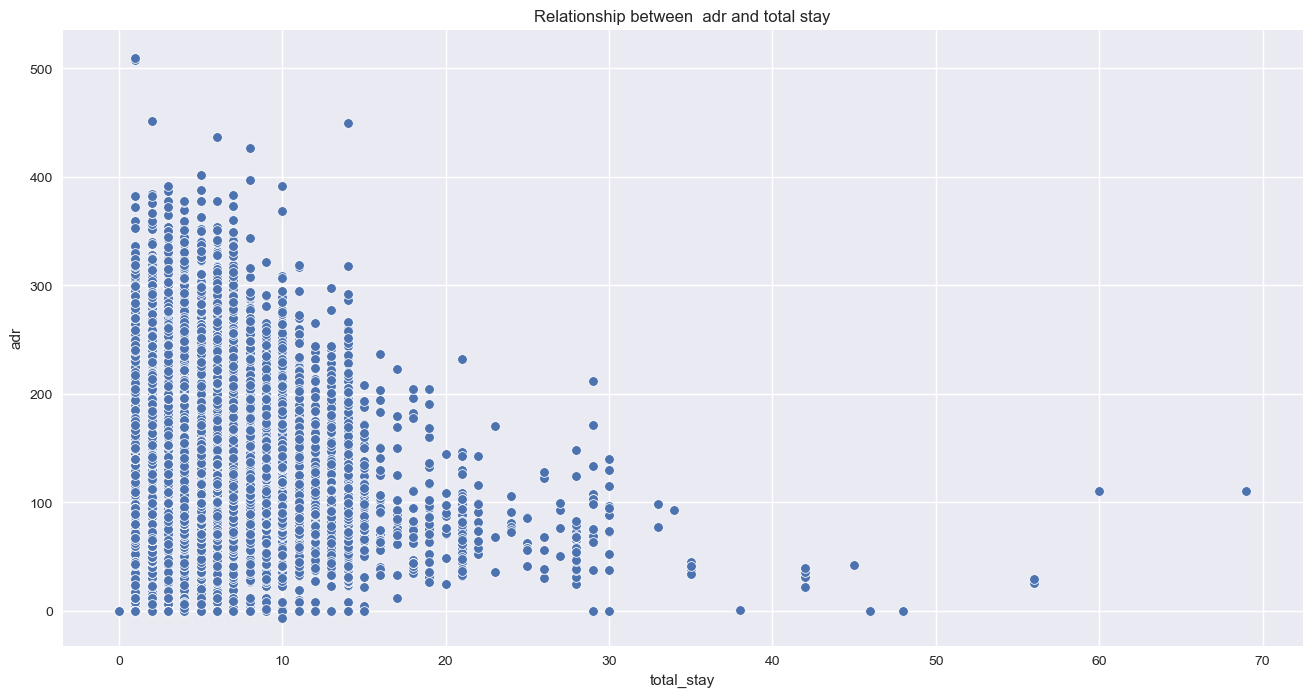

In [117]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['total_stay'],y=df['adr'])
plt.title('Relationship between  adr and total stay')

###From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

# ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

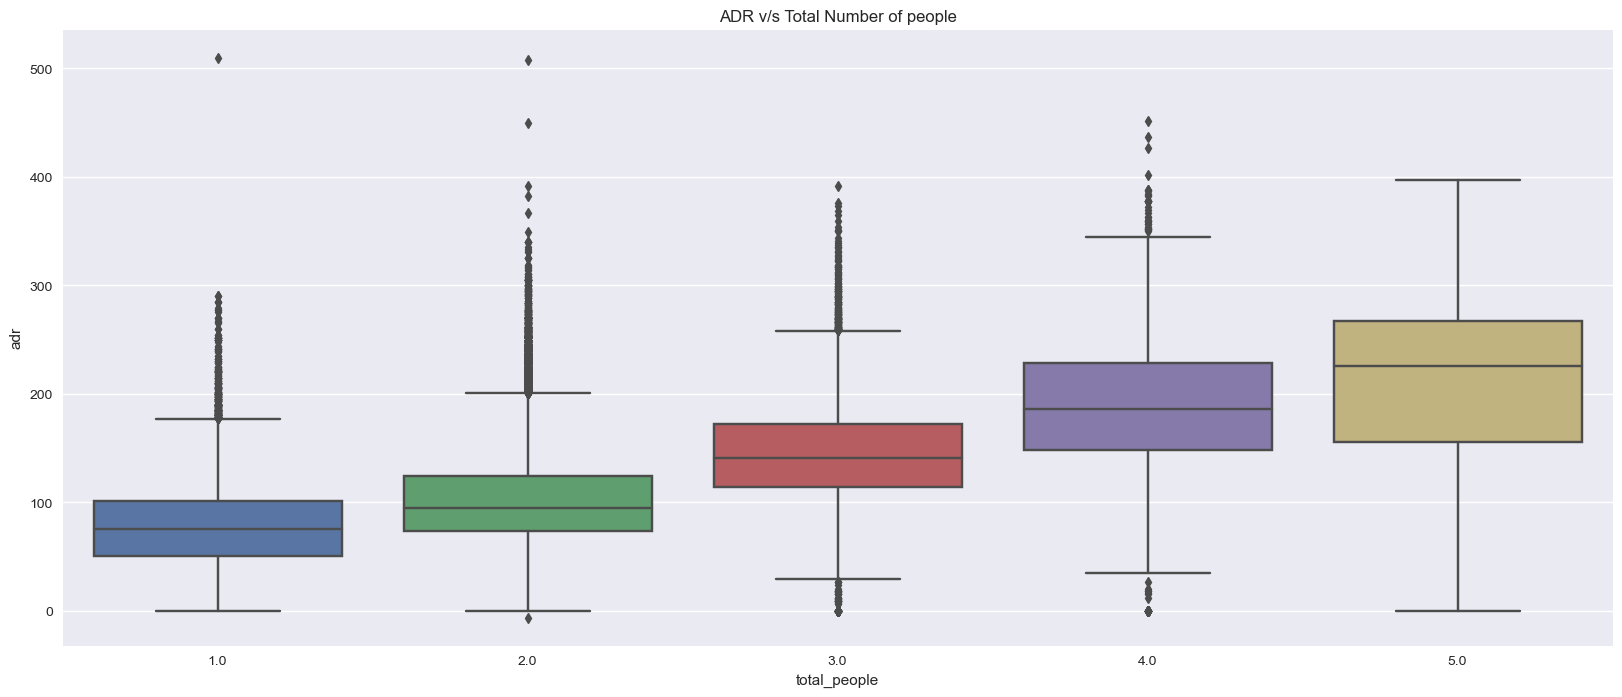

In [118]:
plt.figure(figsize=(20,8))
df2=df[df['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

# As the  total number of people increases adr also increases.
###Thus adr and total people are directly proportional to each other.

# **Conclusions:**

1.	City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2.	27.6 % bookings were got cancelled out of all the bookings.
3.	Only 3.6 % people were revisited the hotels. Rest 96.4 % were new guests. Thus retention rate is low.
4.	The percentage of 0 changes made in the booking was more than 82.3 %.  Percentage of Single changes made was about 12%.
5.	Most of the customers (92.3%) do not require car parking spaces.
6.	79.6 % bookings were made through TA/TO (travel agents/Tour operators).
7.	BB( Bed & Breakfast) is the most preferred  type of meal by the guests. 
8.	Maximum number of guests were from Portugal, i.e. more than 25000 guests.
9.  July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.
10.	Most of the bookings for City hotels and Resort hotel were happened in 2016.
11.	Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
12.	Booking cancellation rate is high for City hotels which almost 30 %.
13.	Average lead time for resort hotel is high.
14.	Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
15.	City hotels have the most repeated guests.
16.	Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
1.	Almost 18.5 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.


# Export file in CSV

In [119]:
df.to_csv("Final_file.csv",index= False)